In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sov_analysis import StackoverflowSurvey

In [2]:
# Source - https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/survey_results_public-2022.csv', index_col='ResponseId')
schema_df = pd.read_csv('data/survey_results_schema-2022.csv', index_col='qid')

india_df = df.loc[df['Country'] == 'India'].copy()

professional_df = df.loc[df['MainBranch'] == 'I am a developer by profession'].copy()
professional_india_df = professional_df[professional_df['Country'] == 'India'].copy()

employed_df = df.loc[df['Employment'] == 'Employed, full-time'].copy()

selfemployed_df = df.loc[df['Employment'] == 'Independent contractor, freelancer, or self-employed'].copy()


professional_india_df.head(3)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,NaN,"Developer, full-stack;Student",NaN,NaN,Start a free trial,India,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;SQL,APL;Bash/Shell;Go;Python;TypeScript,MongoDB;MySQL,Neo4j;PostgreSQL,AWS;Google Cloud;Heroku,DigitalOcean;Firebase;Microsoft Azure;VMware,jQuery;Node.js,Angular;Angular.js;Next.js;Vue.js,NaN,NaN,npm,Unity 3D;Yarn,Atom;CLion;Eclipse;IntelliJ;Notepad++;Visual S...,Android Studio;IPython/Jupyter;Sublime Text;Vi...,Linux-based;macOS,Windows,Git,Command-line,NaN,NaN,NaN,NaN,Google Chat;Microsoft Teams;Zoom,NaN,Very favorable,Collectives on Stack Overflow;Stack Overflow;S...,A few times per week,Yes,I have never participated in Q&A on Stack Over...,"Yes, definitely",18-24 years old,Man,No,Straight / Heterosexual,Indian,None of the above,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
66,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses;Inte...,Udemy,3,2,"Developer, back-end;DevOps specialist","10,000 or more employees",I have little or no influence,Start a free trial;Visit developer communities...,India,INR\tIndian rupee,NaN,Monthly,C#,C++;JavaScript,MongoDB;MySQL,NaN,NaN,NaN,NaN,NaN,.NET,.NET;React Native;TensorFlow,NaN,NaN,Eclipse;Notepad++;Sublime Text;Visual Studio;V...,Notepad++;Visual Studio;Visual Studio Code,Windows,Linux-based,Git,Code editor;Command-line,NaN,NaN,Jira Work Management,Jira Work Management,Cisco Webex Teams;Microsoft Teams;Zoom,Microsoft Teams,Unfavorable,Stack Overflow;Stack Exchange,Daily or almost daily,Not sure/can't remember,NaN,"Yes, somewhat",18-24 years old,Man,No,Straight / Heterosexual,Indian,None of the above,None of the above,Yes,Independent contributor,2.0,Strongly agree,Agree,Disagree,Agree,Agree,Agree,Agree,Never,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,Just right,Microservices;Continuous integration (CI) and ...,No,Yes,Yes,Too long,Easy,NaN
141,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,NaN,13,12,"Developer, front-end;Developer, full-stack;Des...","10,000 or more employees",I have a great deal of infl

# Country Distribution

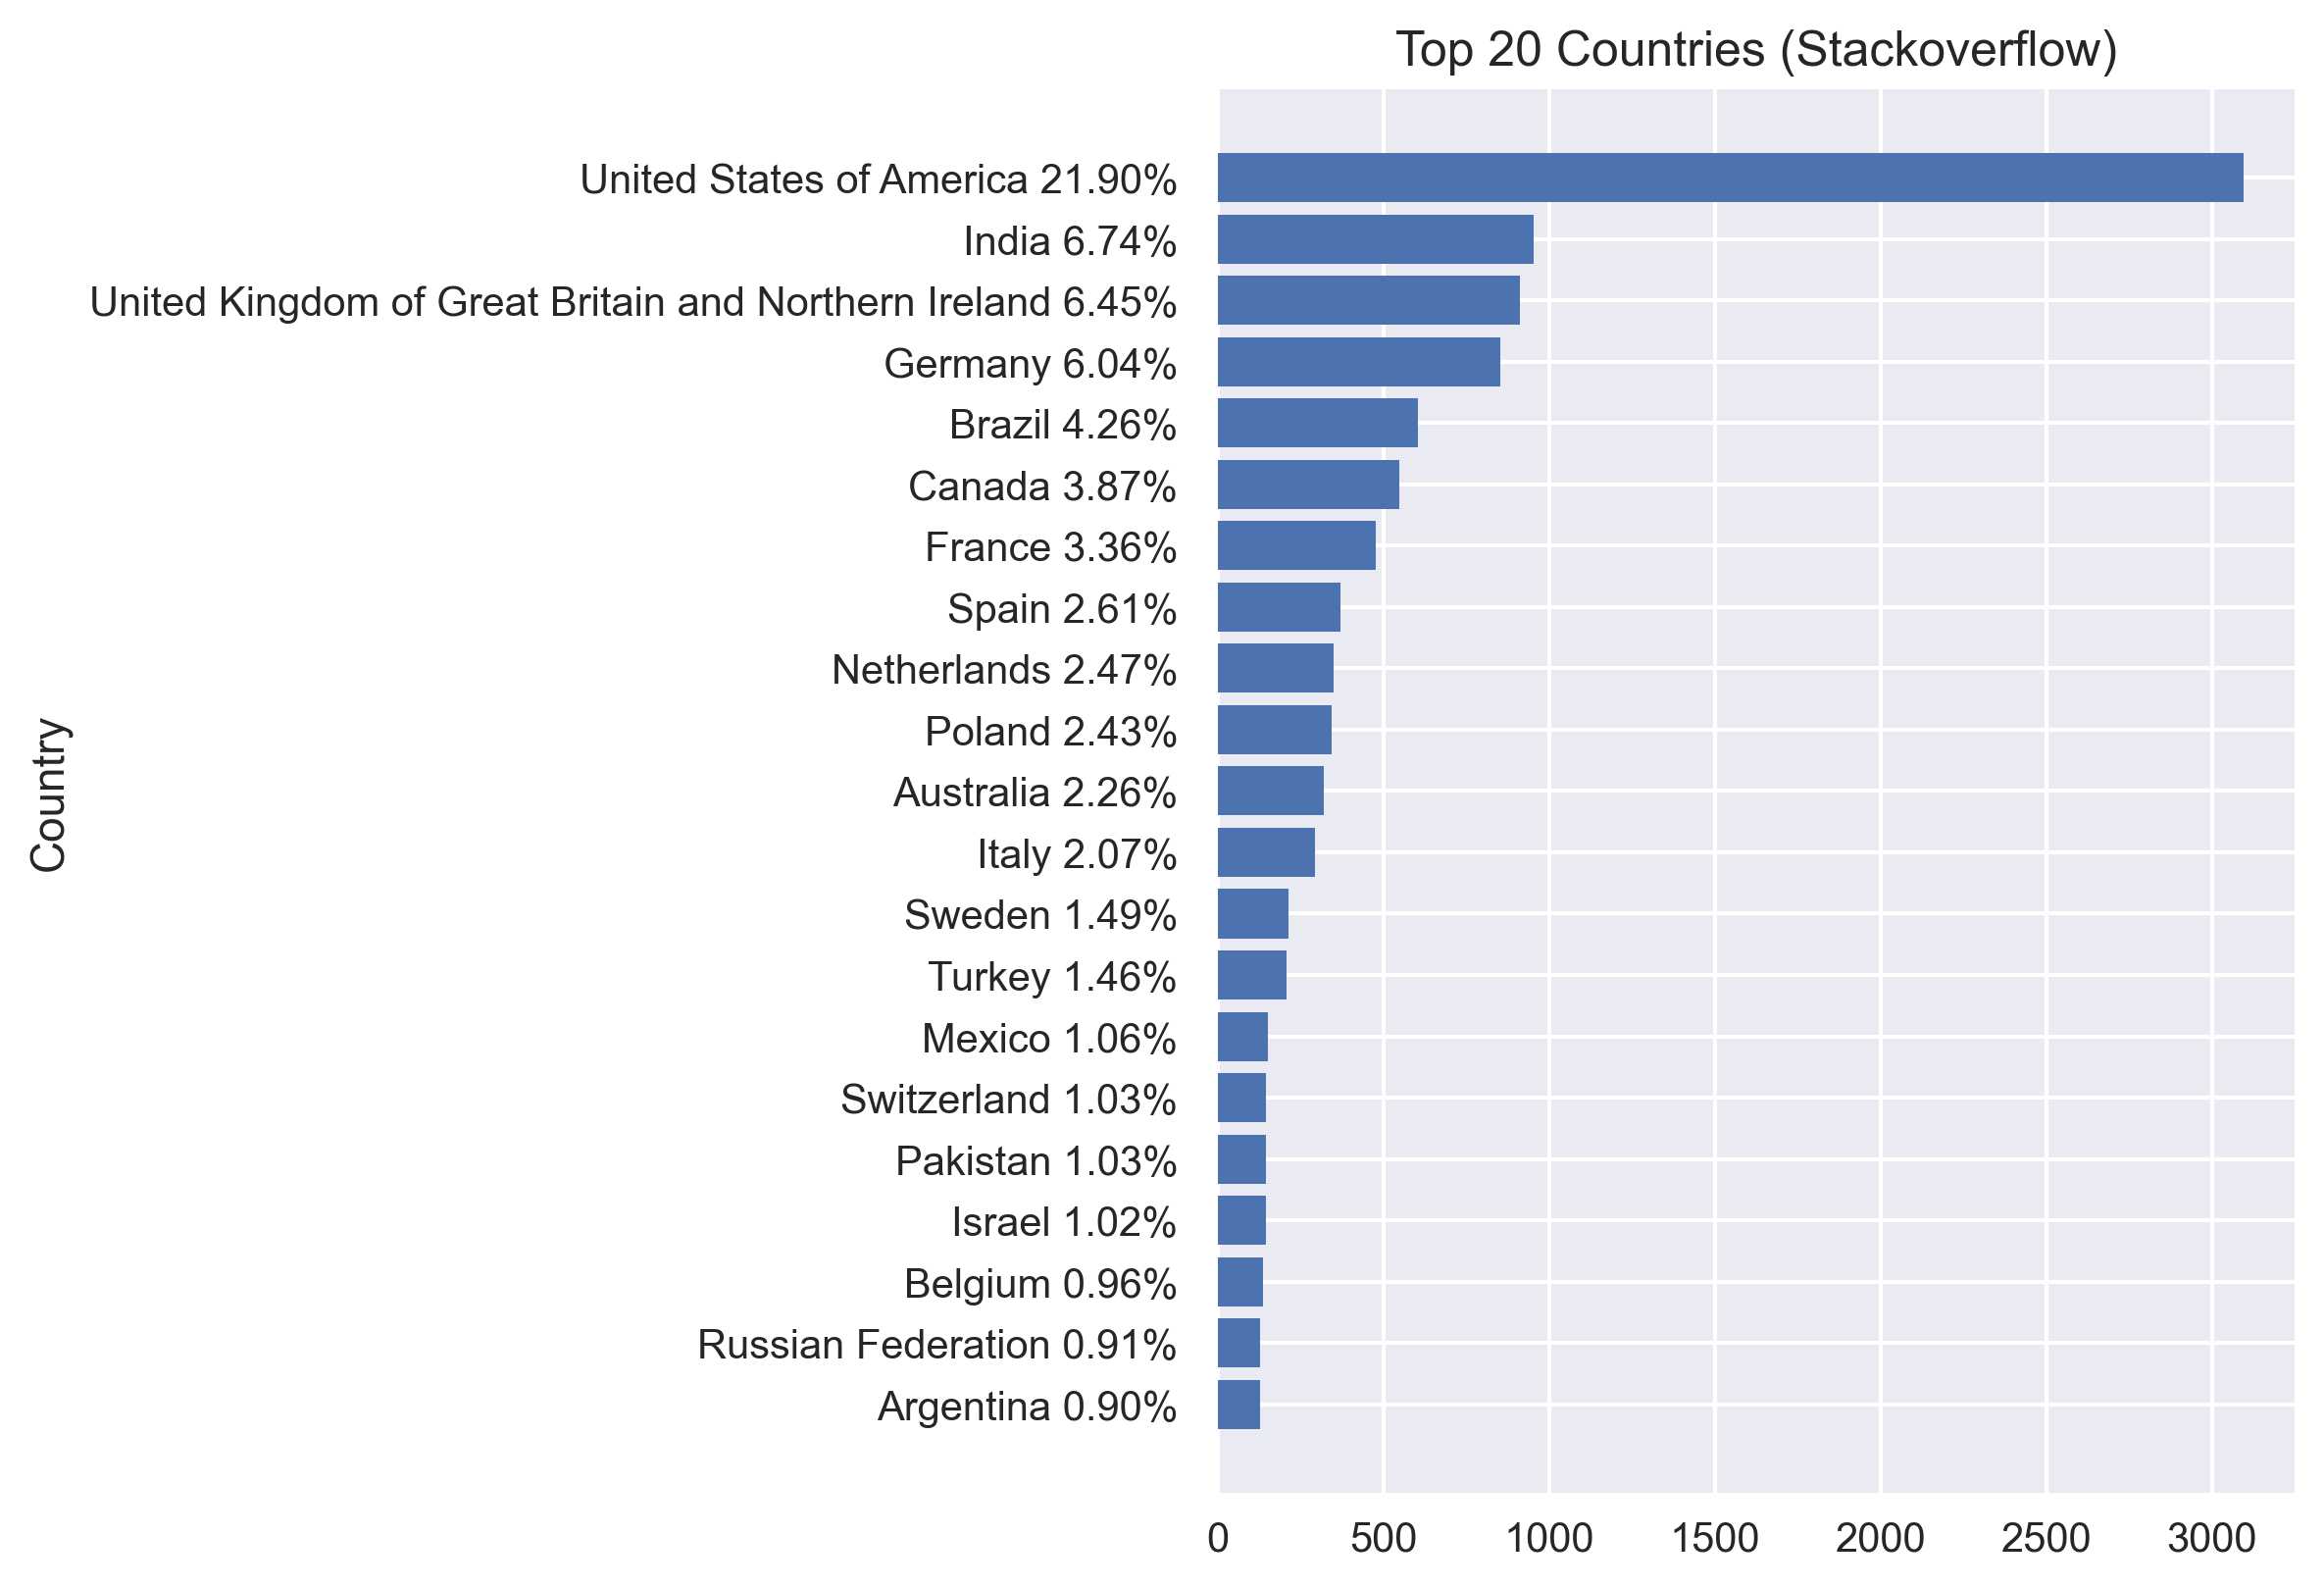

In [24]:
sov = StackoverflowSurvey(professional_df, keep_cols=['Country'])
data, size = sov.distribution('Country', top=20, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='', 
                                           ylabel='Country', 
                                           title='Top 20 Countries (Stackoverflow)',
                                          path='data/img/Country Distribution Stackoverflow 2022')

# Top Languages used by Professional developers

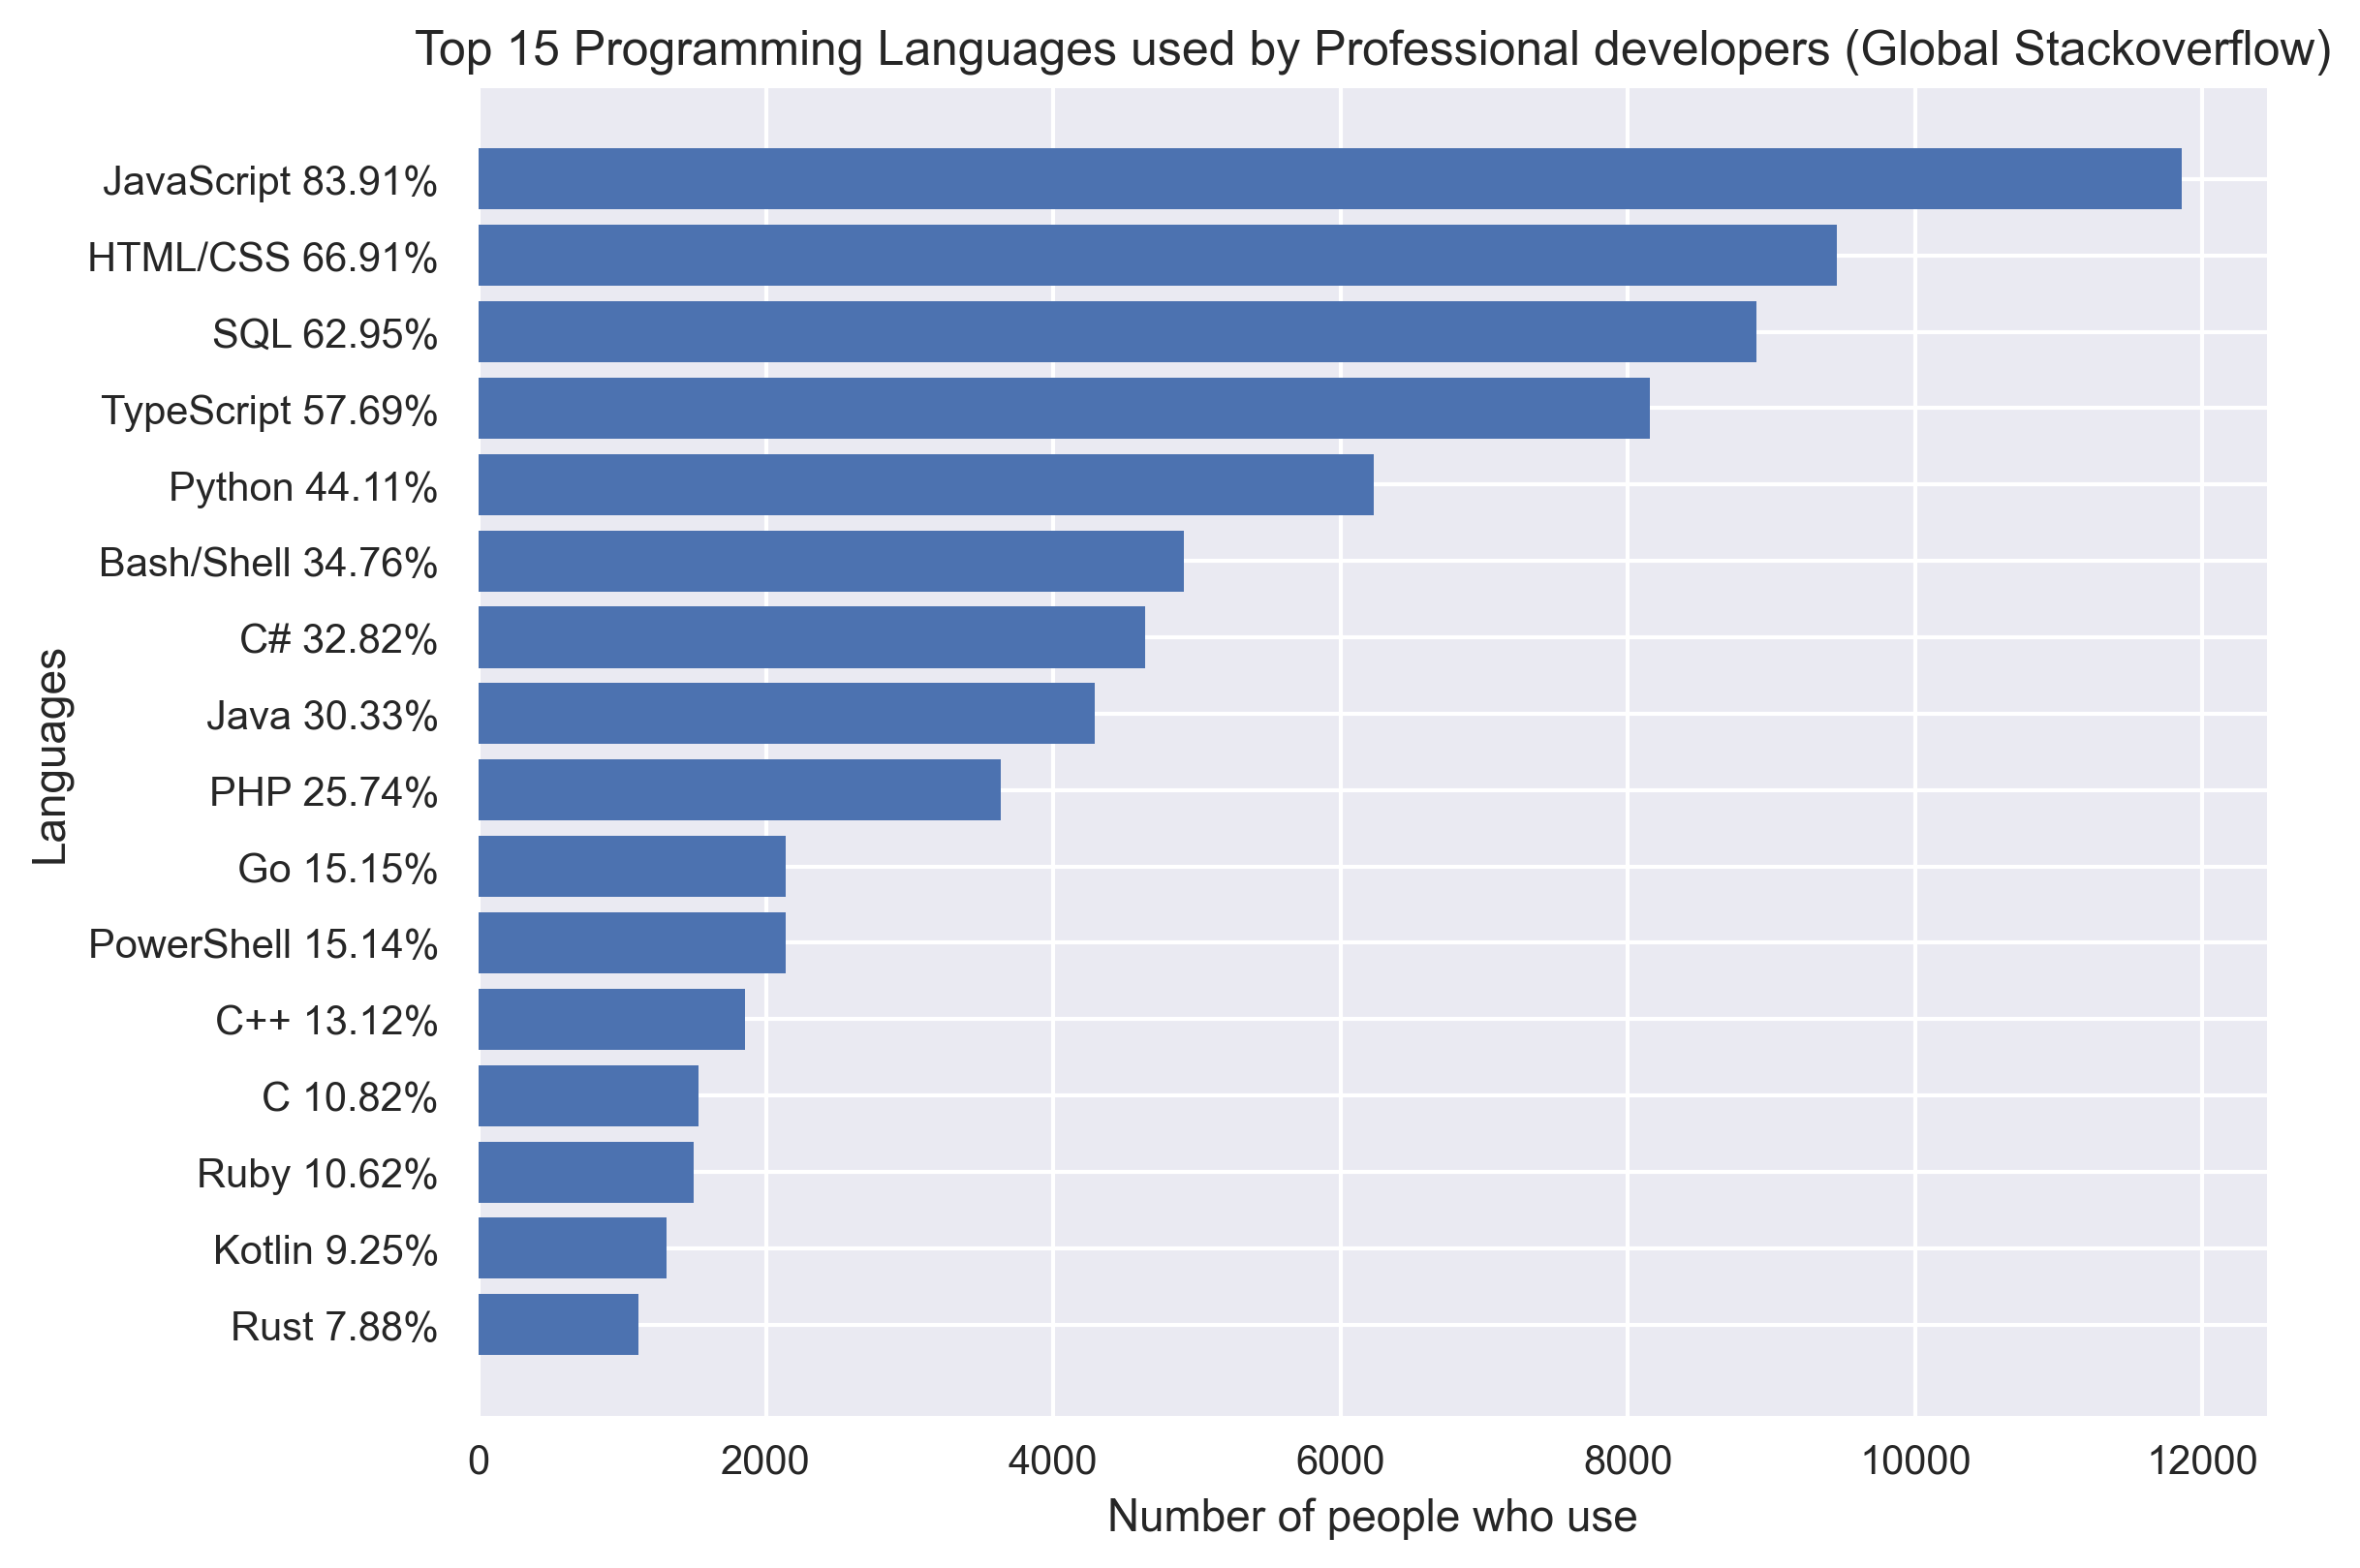

In [15]:
sov = StackoverflowSurvey(professional_df, keep_cols=['LanguageHaveWorkedWith'])
data, size = sov.distribution('LanguageHaveWorkedWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who use', 
                                           ylabel='Languages', 
                                           title='Top 15 Programming Languages used by Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Languagues used by Professionals 2022')

# Language Wanted by Professional Developers

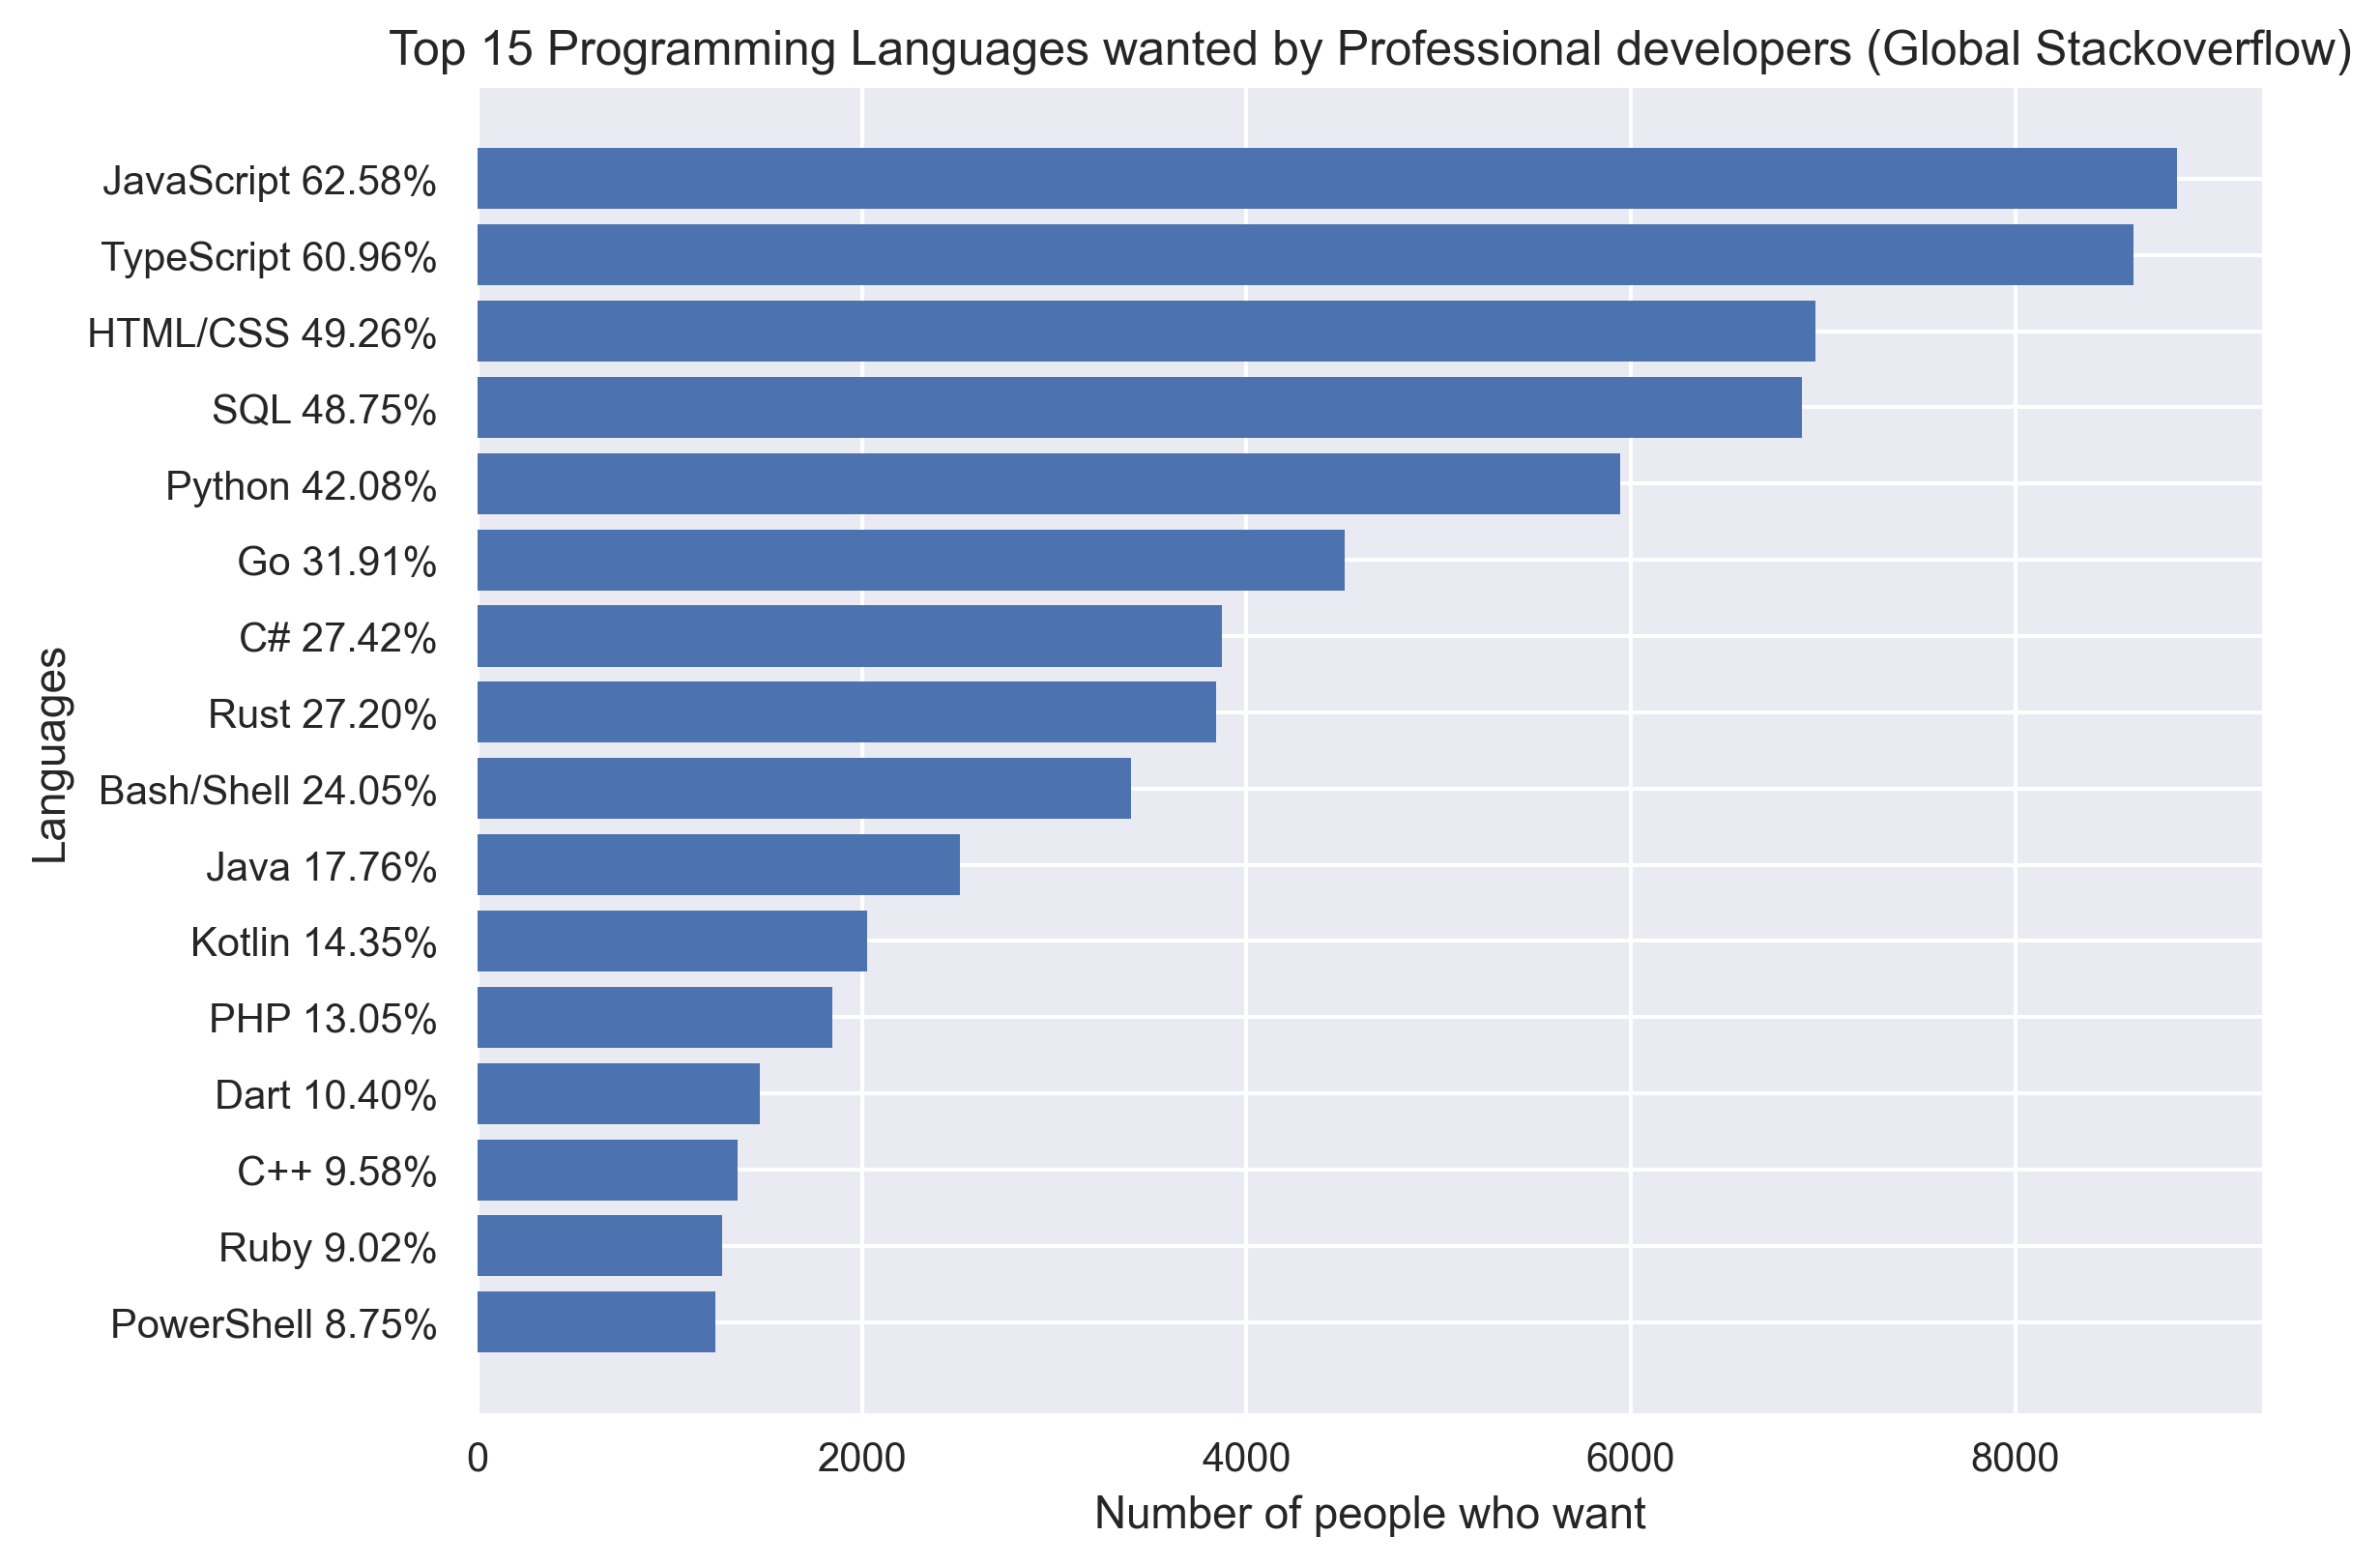

In [5]:
sov = StackoverflowSurvey(professional_df, keep_cols=['LanguageWantToWorkWith'])
data, size = sov.distribution('LanguageWantToWorkWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Languages', 
                                           title='Top 15 Programming Languages wanted by Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Languagues wanted by Professionals 2022')

**JavaScript** is the most used and most wanted programming language globally. More Professional developers want to use **TypeScript**.
**SQL & Python** are also among the top.

# Top Web Frameworks used by professional developers

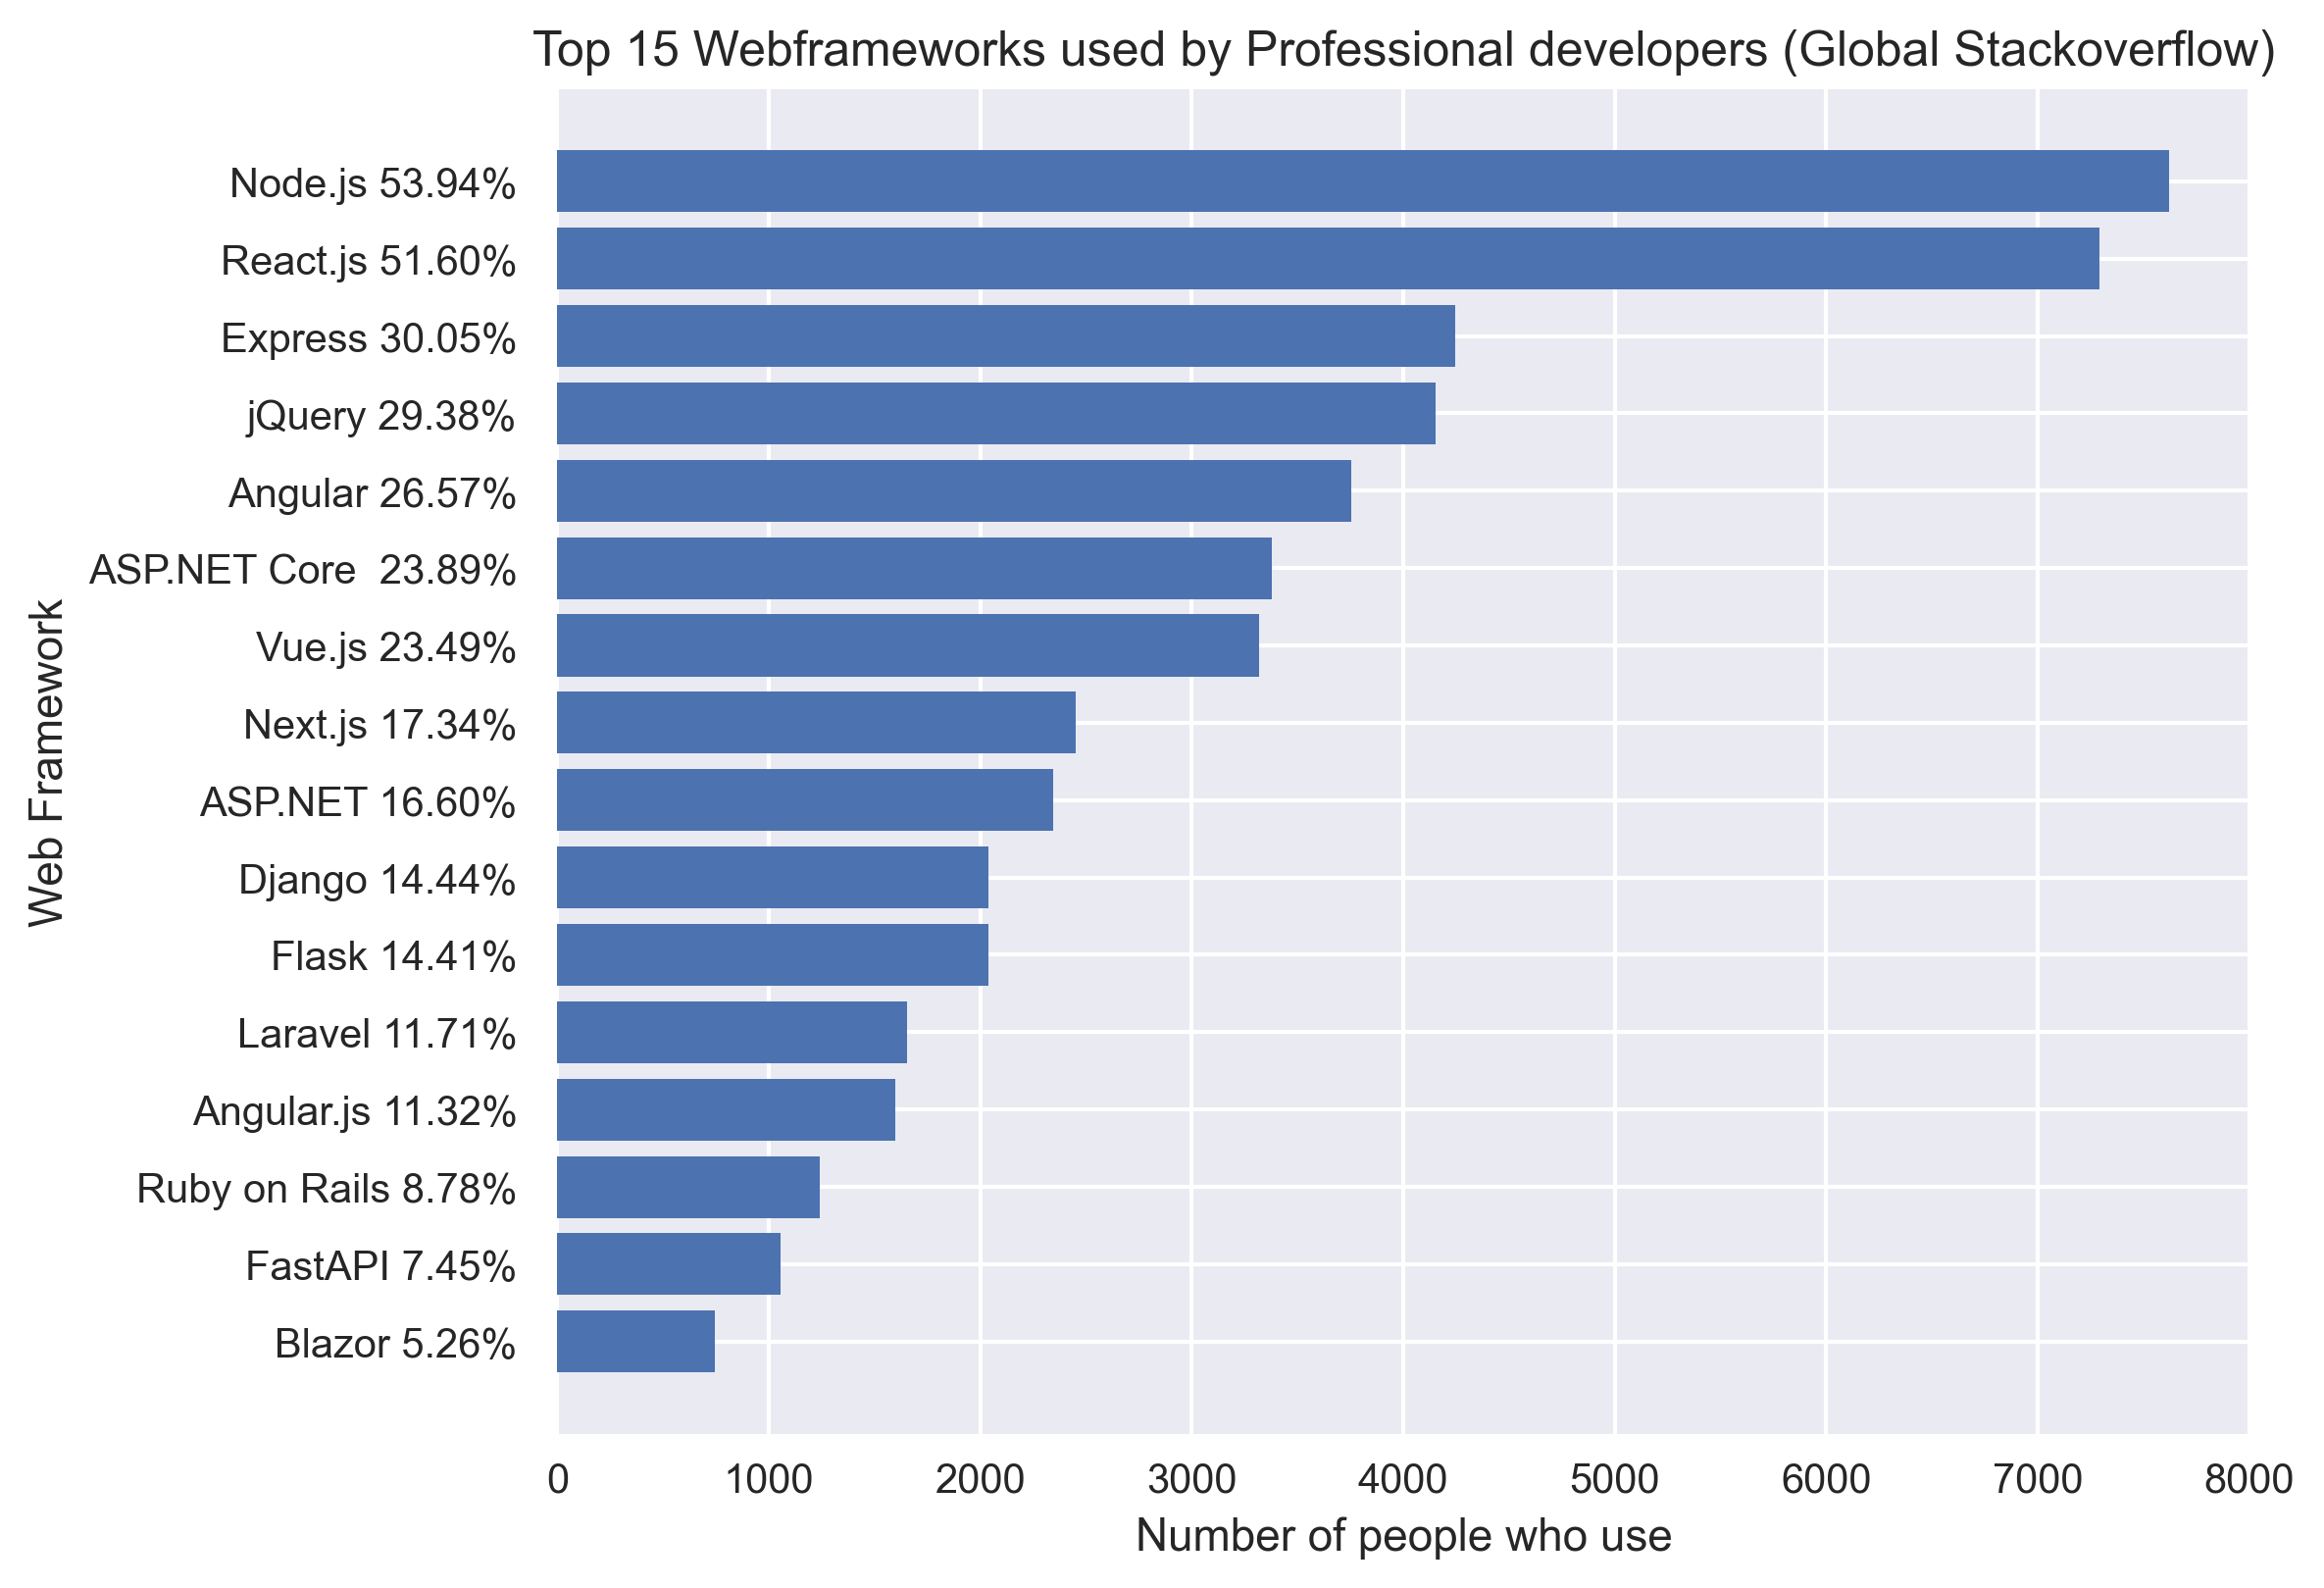

In [6]:
sov = StackoverflowSurvey(professional_df, keep_cols=['WebframeHaveWorkedWith'])
data, size = sov.distribution('WebframeHaveWorkedWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who use', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks used by Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Webframeworks used by Professionals 2022')

# Top Web Frameworks wanted by Professional developers

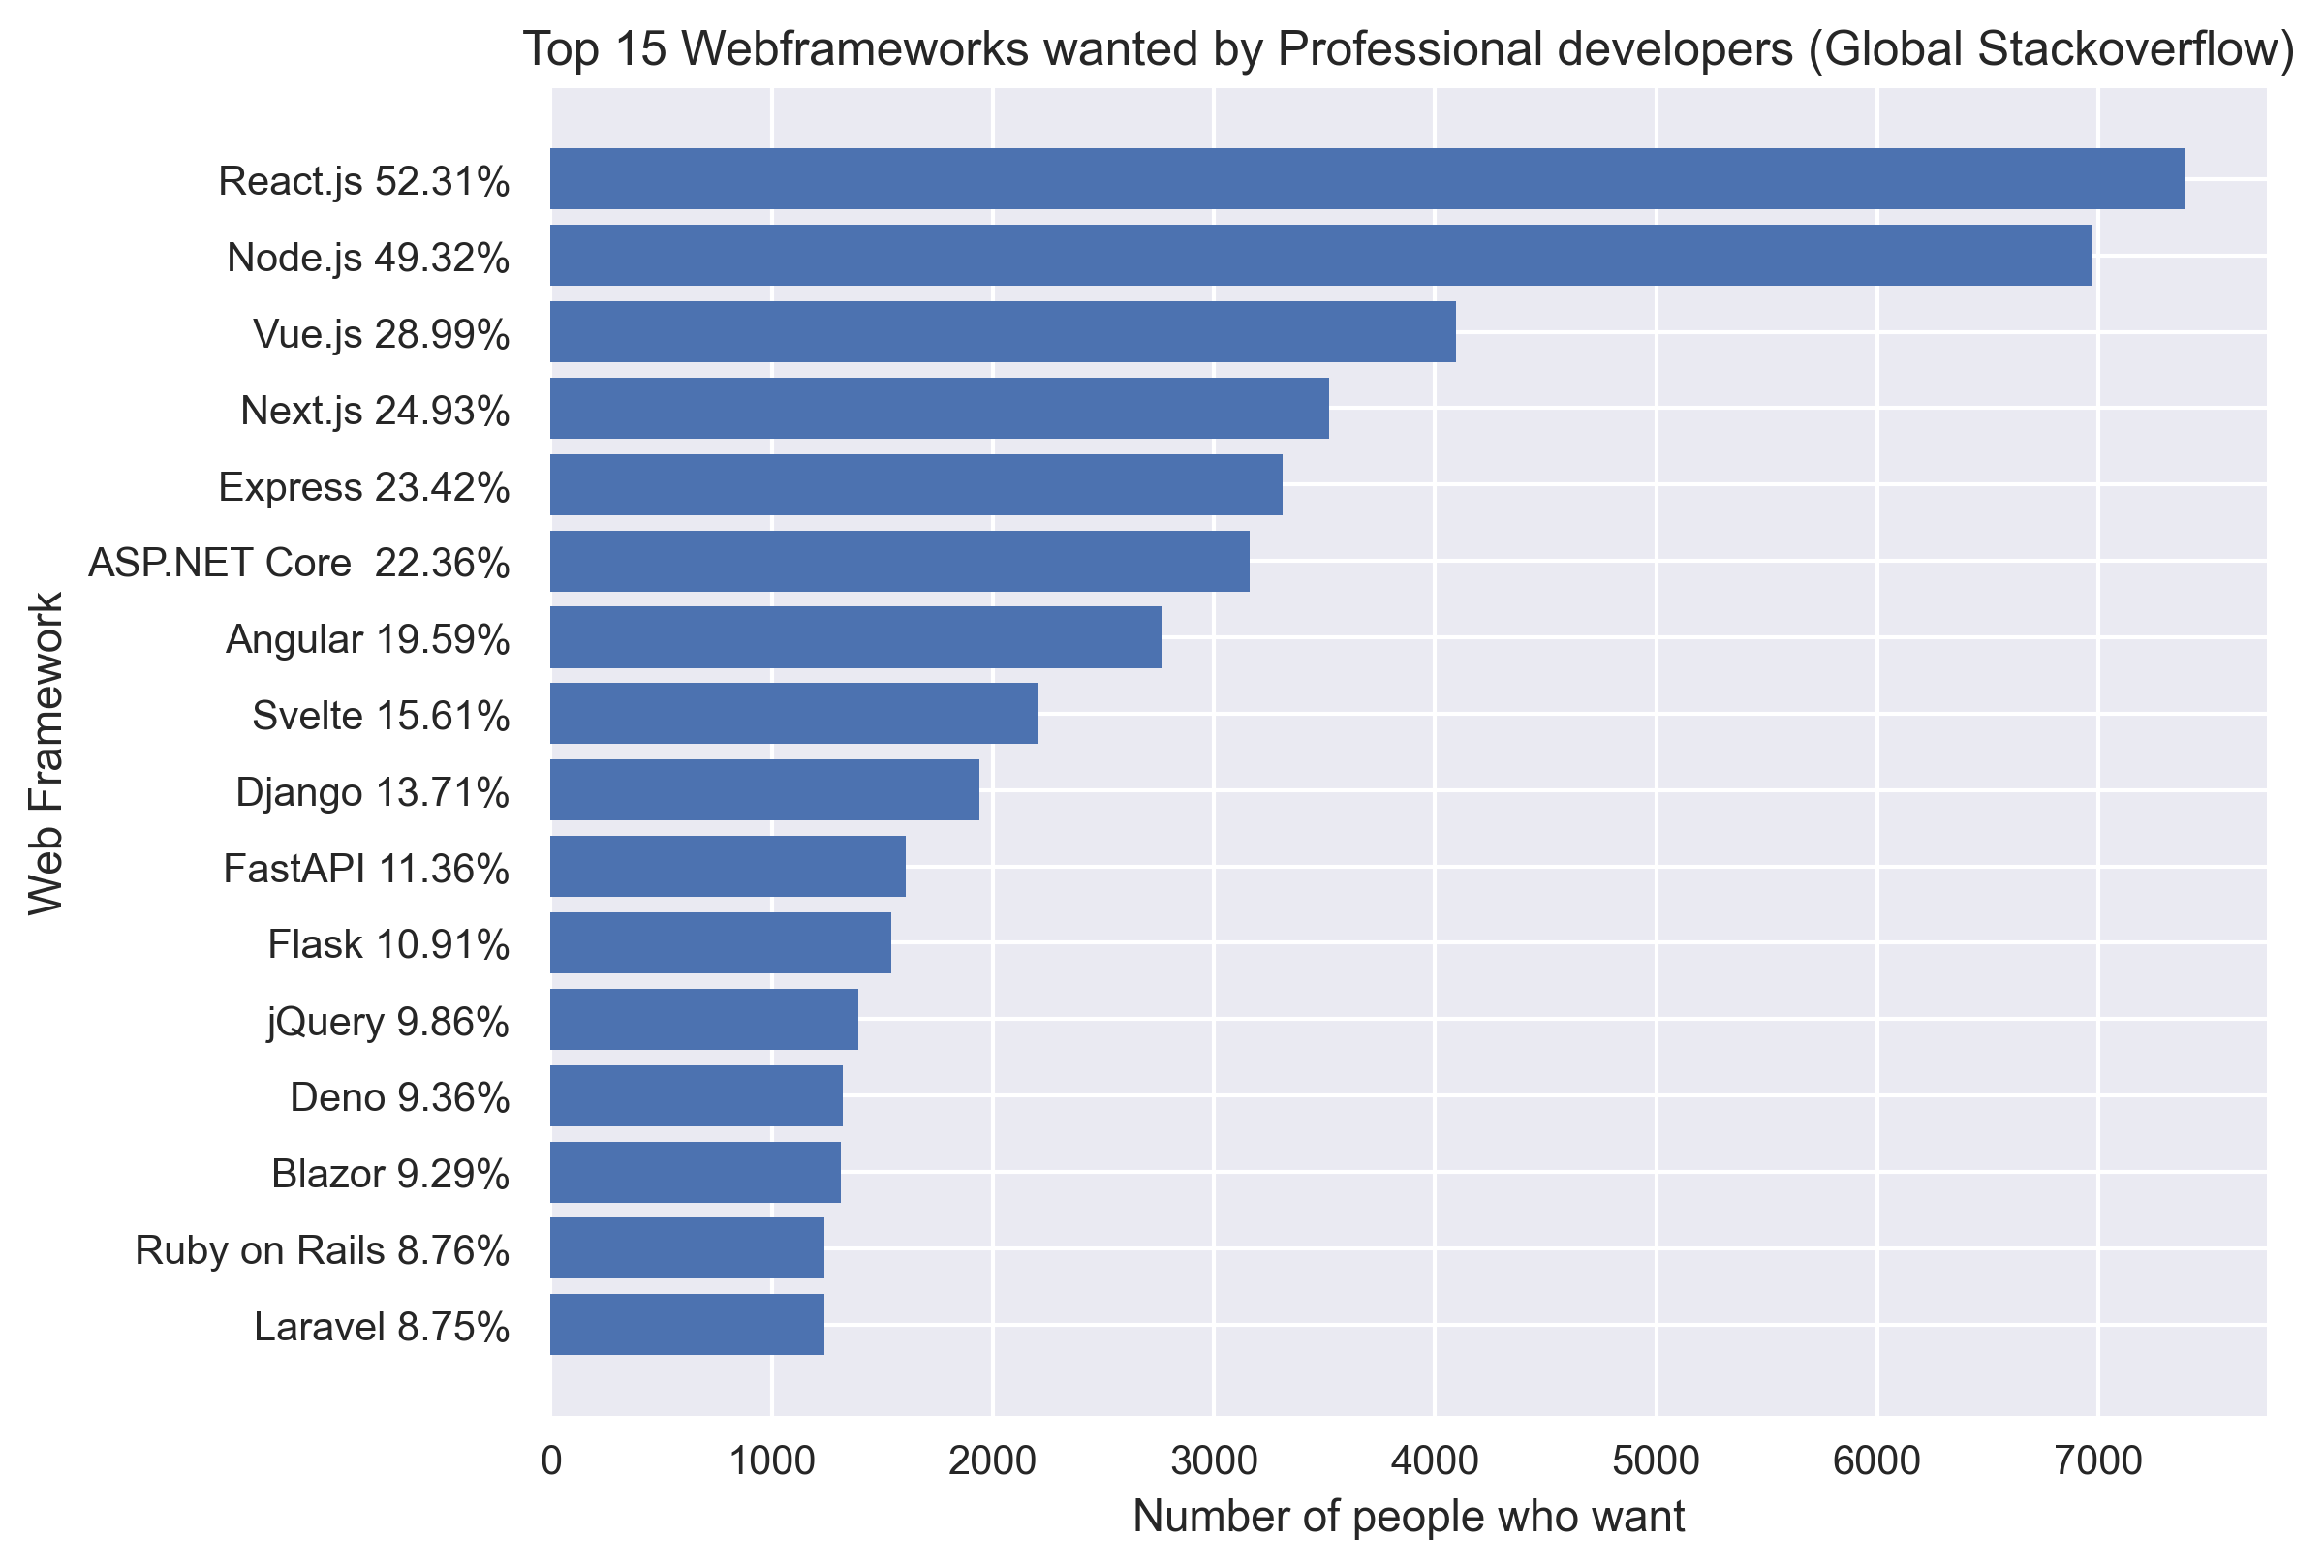

In [7]:
sov = StackoverflowSurvey(professional_df, keep_cols=['WebframeWantToWorkWith'])
data, size = sov.distribution('WebframeWantToWorkWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks wanted by Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Webframeworks wanted by Professionals 2022')

# Top Languages for backend developers

In [10]:
sov.df['DevType']

,DevType,LanguageHaveWorkedWith
ResponseId,,
11,"Developer, full-stack;Developer, back-end",Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL
13,"Developer, full-stack",C;HTML/CSS;Rust;SQL;Swift;TypeScript
15,"Developer, full-stack;Academic researcher;DevO...",HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala
17,"Developer, full-stack",C#;Java;PHP;Python;R
22,"Developer, full-stack",Python;SQL;TypeScript
...,...,...
73103,"Developer, front-end;Developer, full-stack;Dev...",Bash/Shell;C;C#;C++;HTML/CSS;JavaScript;PowerS...
73117,"Developer, front-end;Developer, full-stack;Dev...",C#;HTML/CSS;Java;JavaScript
73119,"Developer, full-stack;Developer, mobile",HTML/CSS;JavaScript;TypeScript


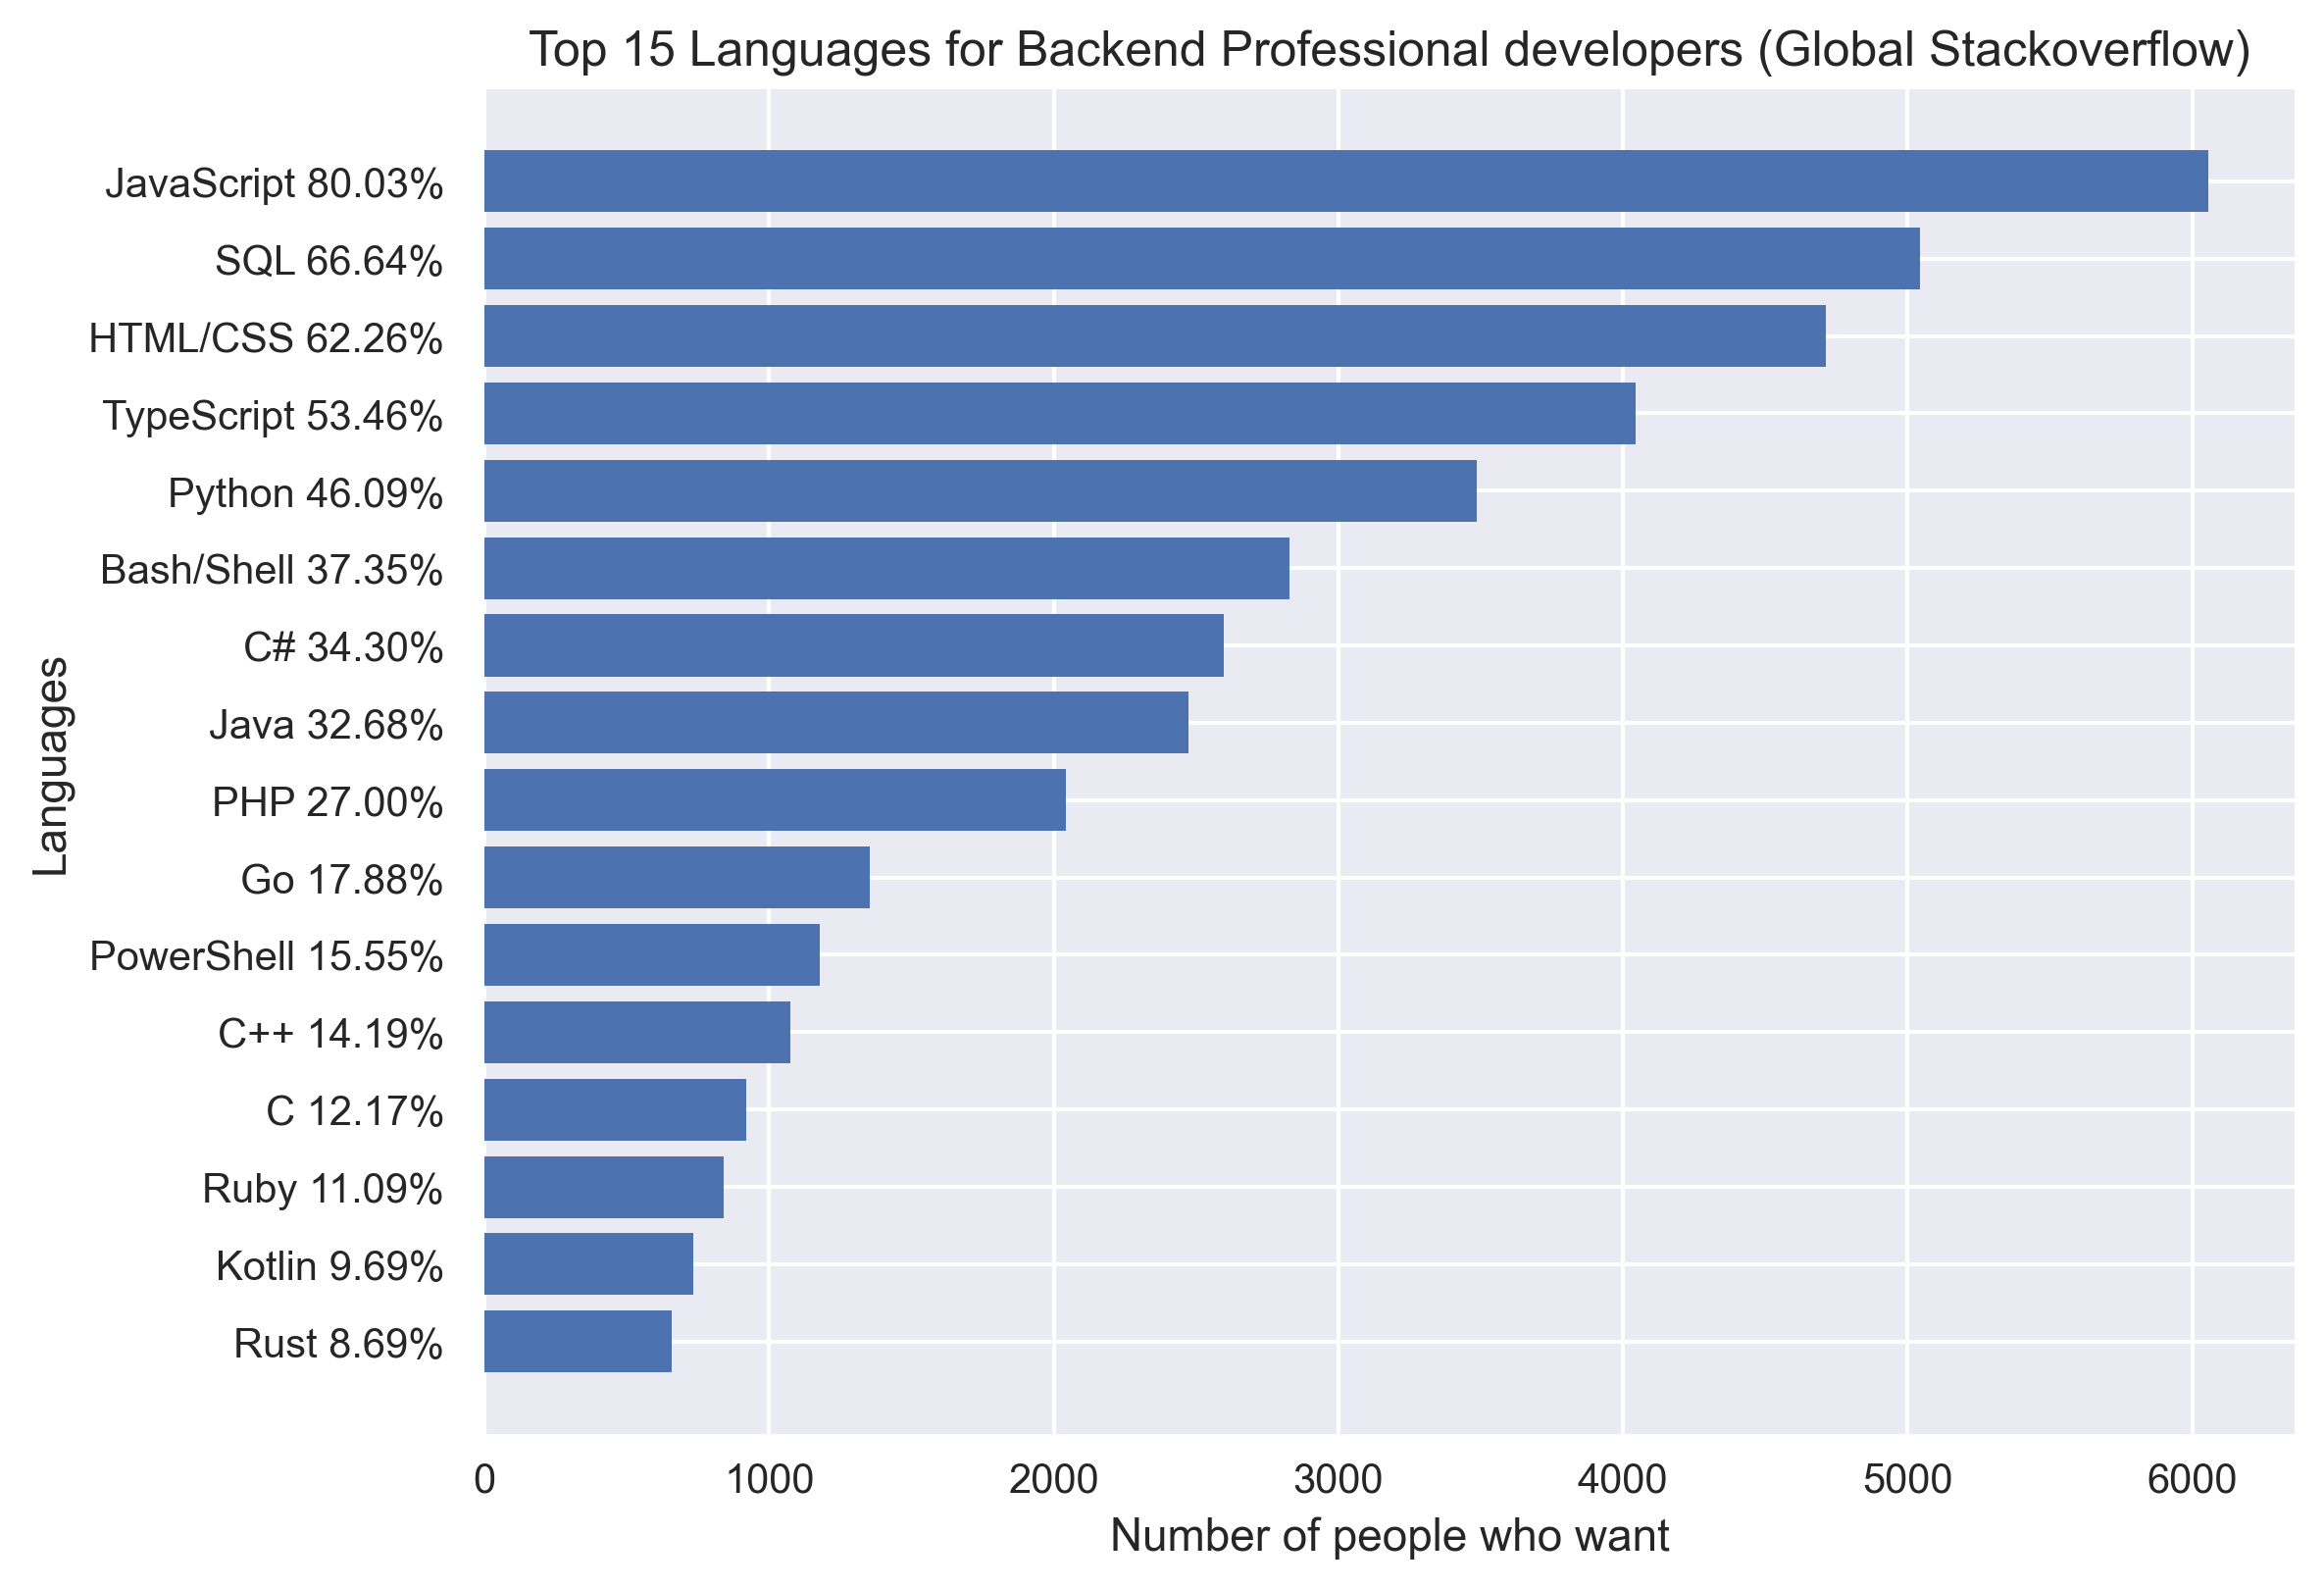

In [16]:
sov = StackoverflowSurvey(professional_df, keep_cols=['LanguageHaveWorkedWith', 'DevType'])
data, size = sov.distribution('LanguageHaveWorkedWith', top=15, filter=('DevType', 'back-end'), exact_search=False, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Languages', 
                                           title='Top 15 Languages for Backend Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Languages used by Backend Professionals 2022')

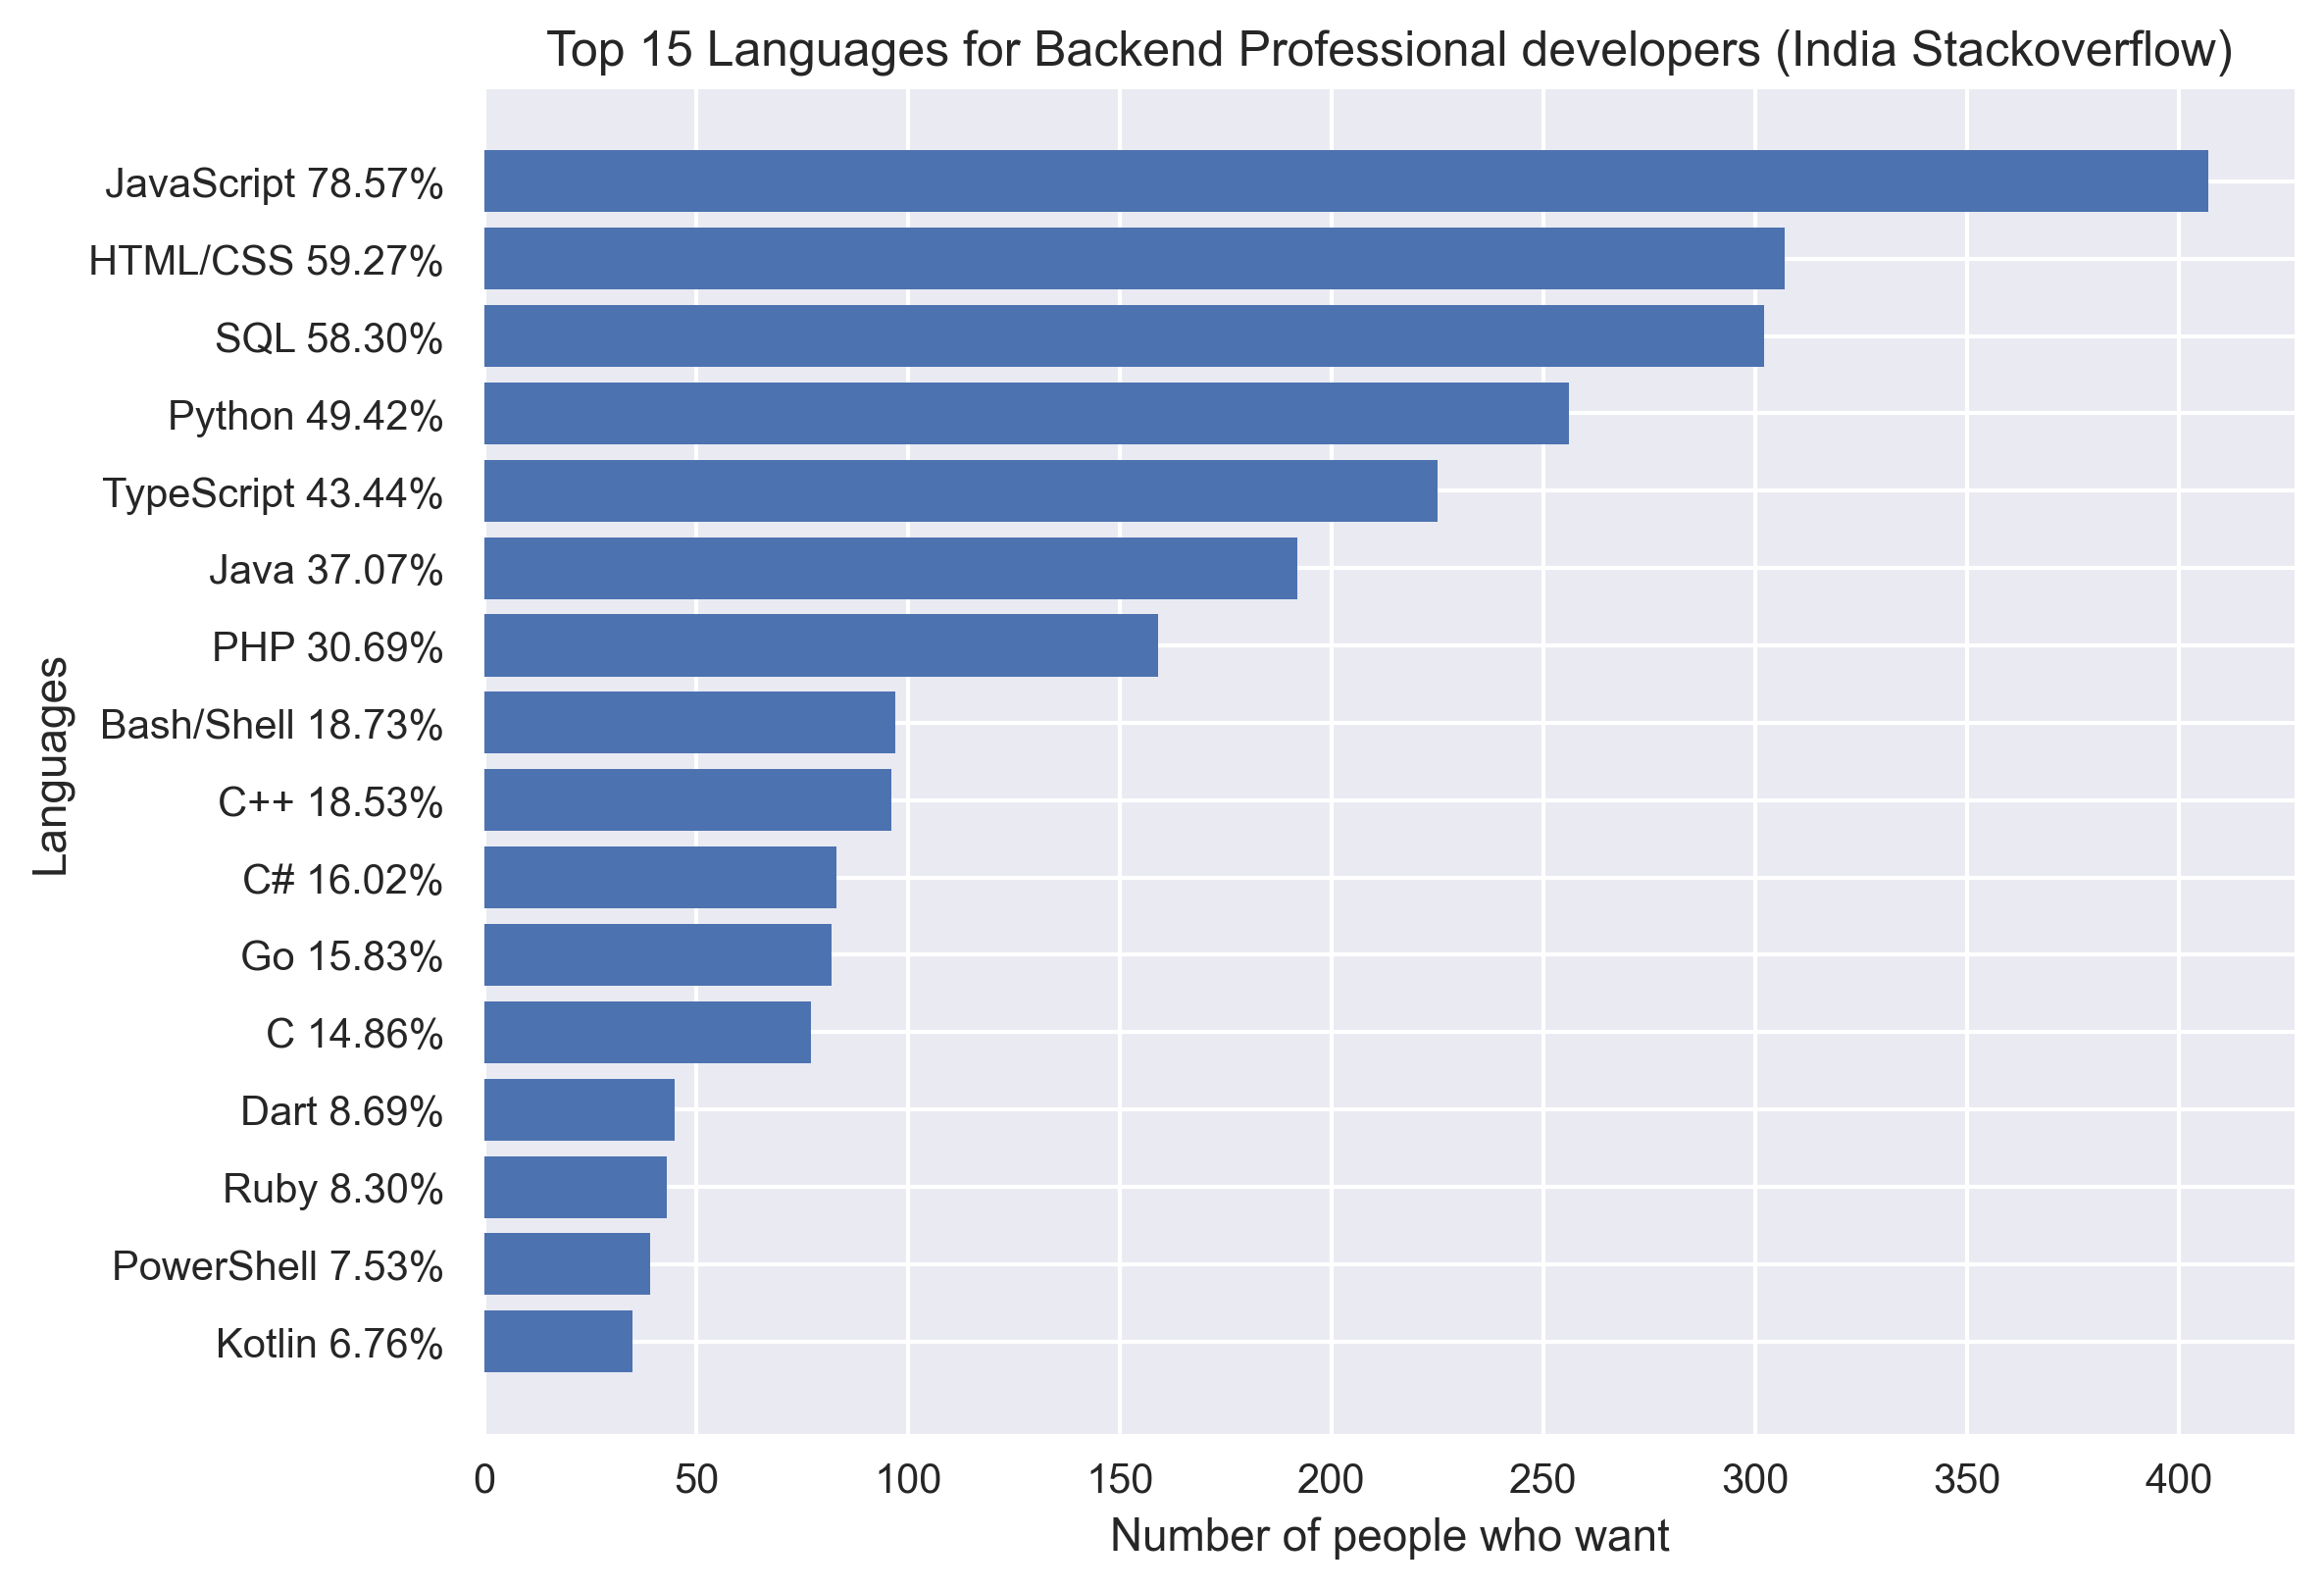

In [17]:
sov = StackoverflowSurvey(professional_india_df, keep_cols=['LanguageHaveWorkedWith', 'DevType'])
data, size = sov.distribution('LanguageHaveWorkedWith', top=15, filter=('DevType', 'back-end'), exact_search=False, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Languages', 
                                           title='Top 15 Languages for Backend Professional developers (India Stackoverflow)',
                                          path='data/img/Top Languages used by Indian Backend Professionals 2022')

# Top Databases used by professional Developers

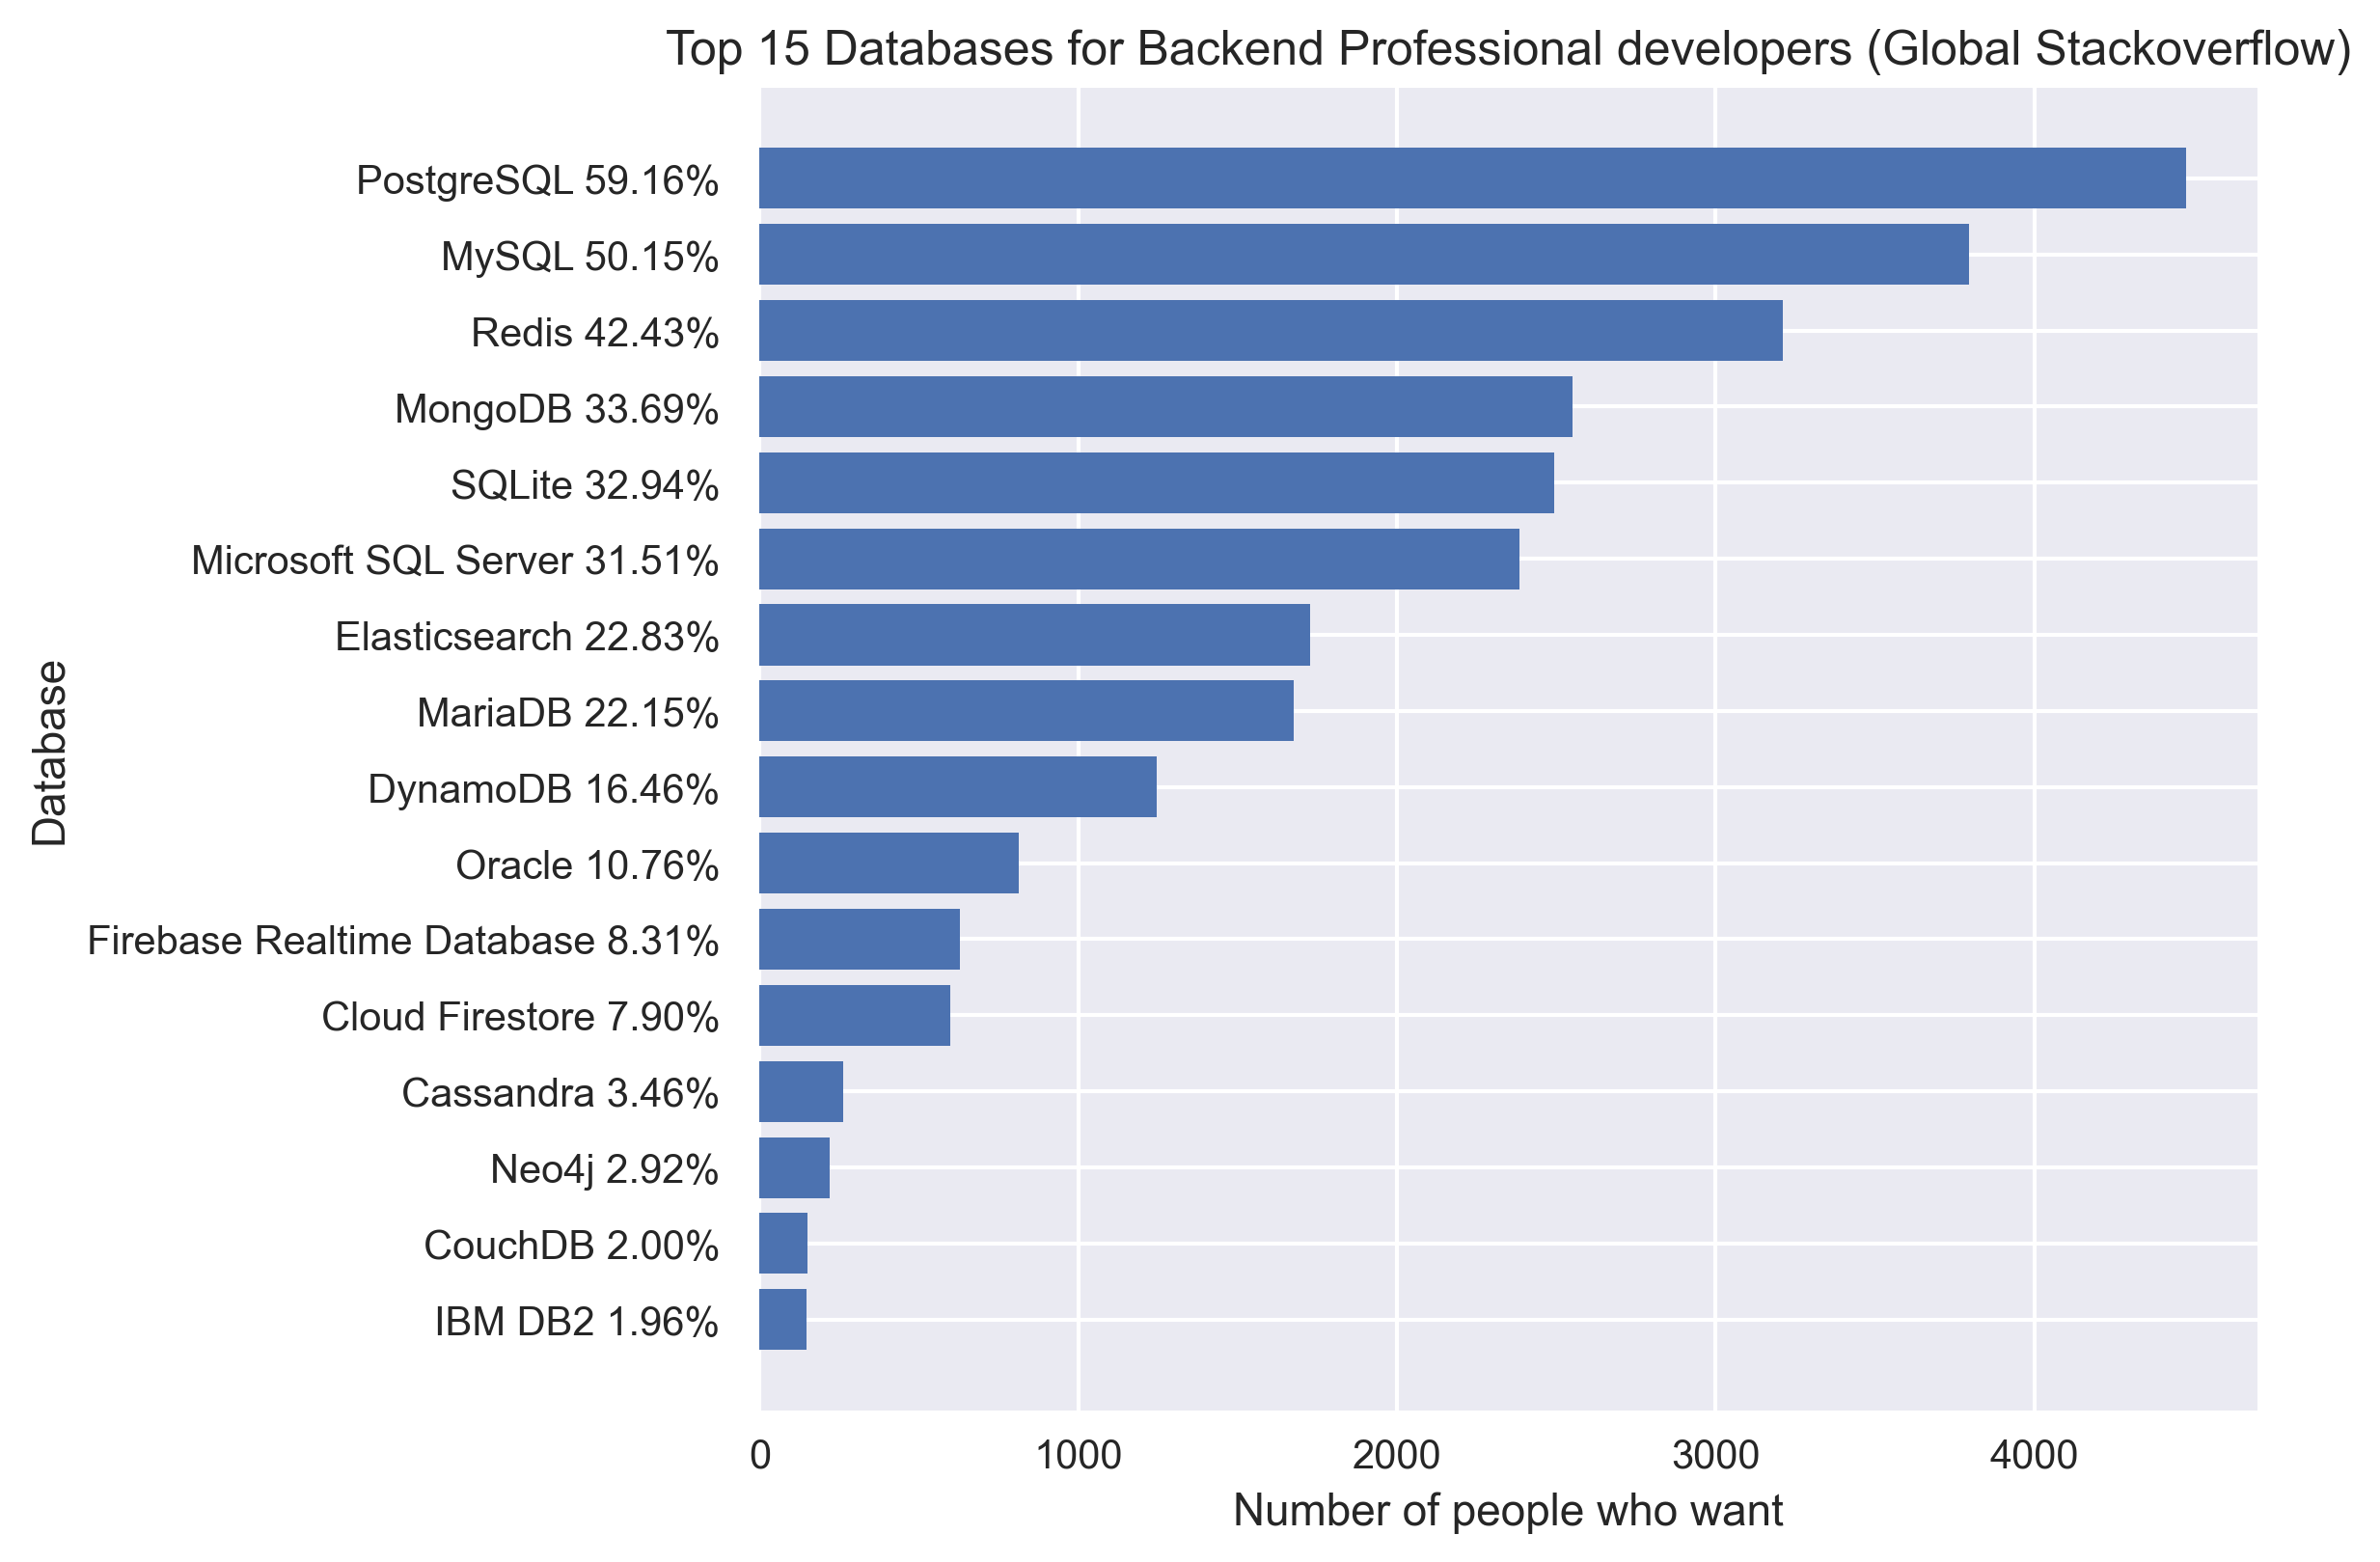

In [18]:
sov = StackoverflowSurvey(professional_df, keep_cols=['DatabaseHaveWorkedWith', 'DevType'])
data, size = sov.distribution('DatabaseHaveWorkedWith', top=15, filter=('DevType', 'back-end'), exact_search=False, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Database', 
                                           title='Top 15 Databases for Backend Professional developers (Global Stackoverflow)',
                                          path='data/img/Top Databases used by Backend Professionals 2022')

# Top Databases used by Indian Professional Backend developers

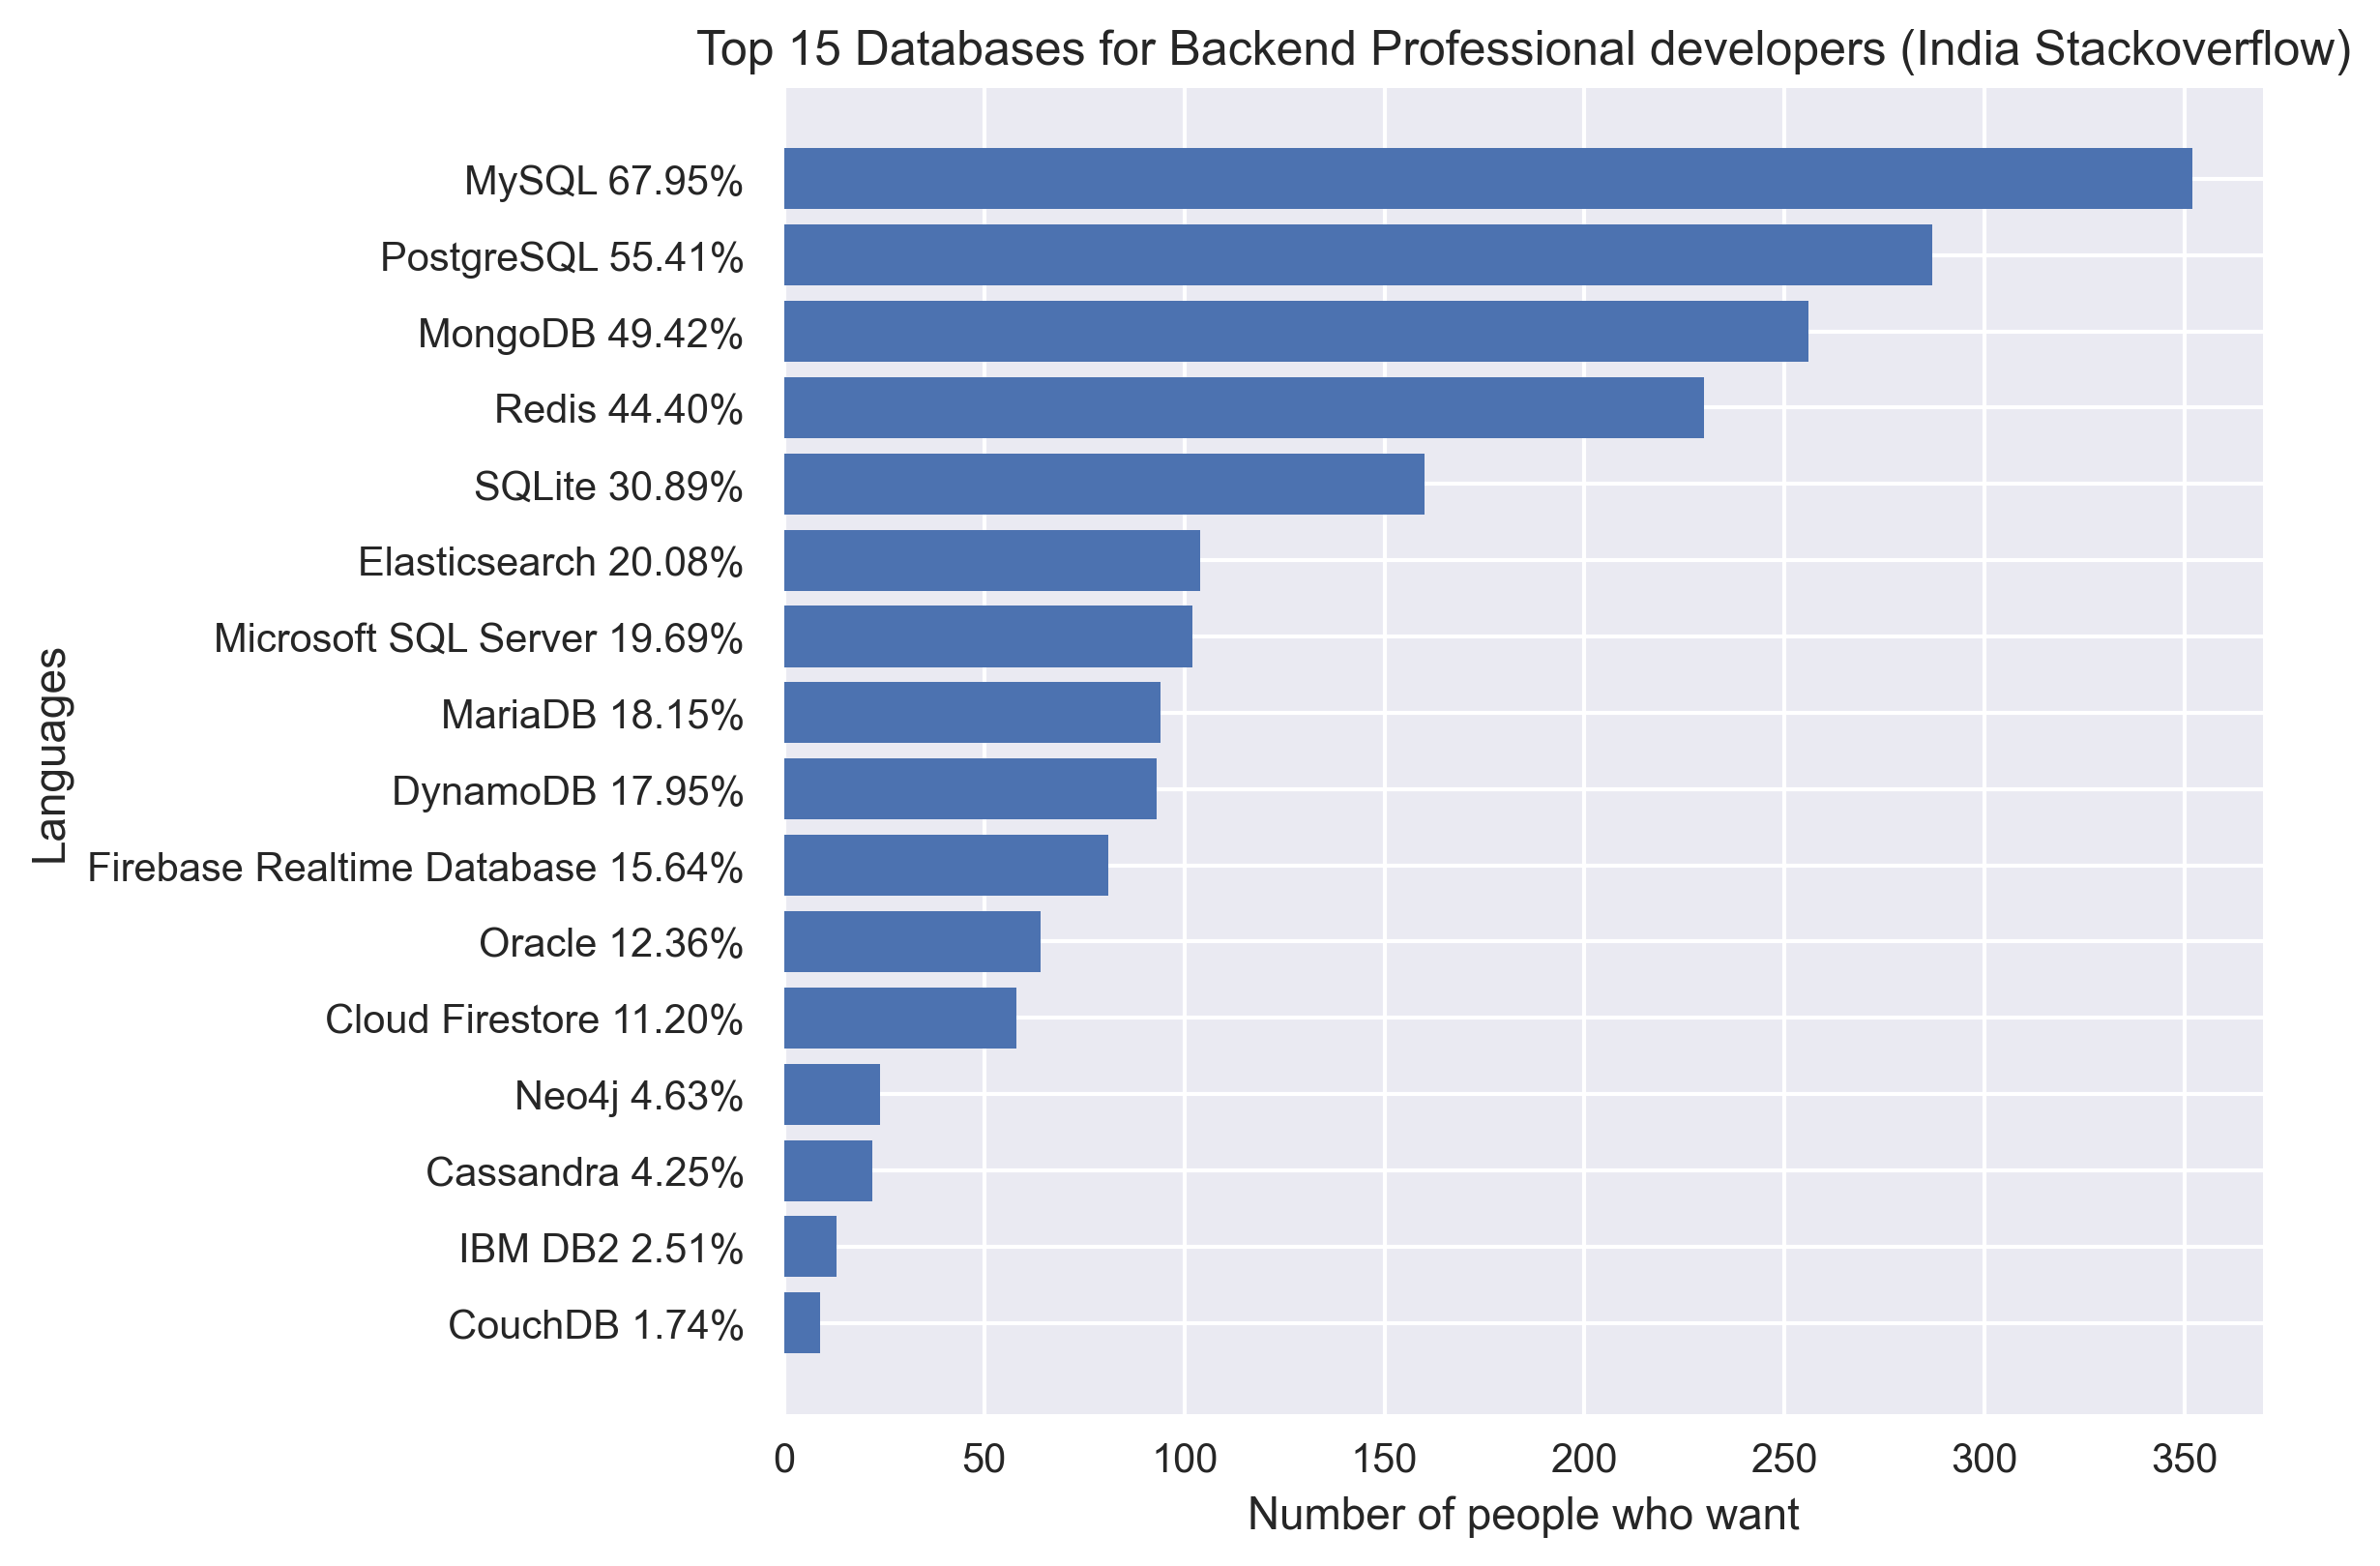

In [19]:
sov = StackoverflowSurvey(professional_india_df, keep_cols=['DatabaseHaveWorkedWith', 'DevType'])
data, size = sov.distribution('DatabaseHaveWorkedWith', top=15, filter=('DevType', 'back-end'), exact_search=False, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Languages', 
                                           title='Top 15 Databases for Backend Professional developers (India Stackoverflow)',
                                          path='data/img/Top Databases used by Indian Backend Professionals 2022')

In India **MongoDB** is significantly used by professional developers as compared to global data. **PostgreSQL**, **MySQL** and **Redis** are among the top database technologies. **SQLite** is also gaining popularity among developers.

# Top 15 Web frameworks used by Professional developers in India

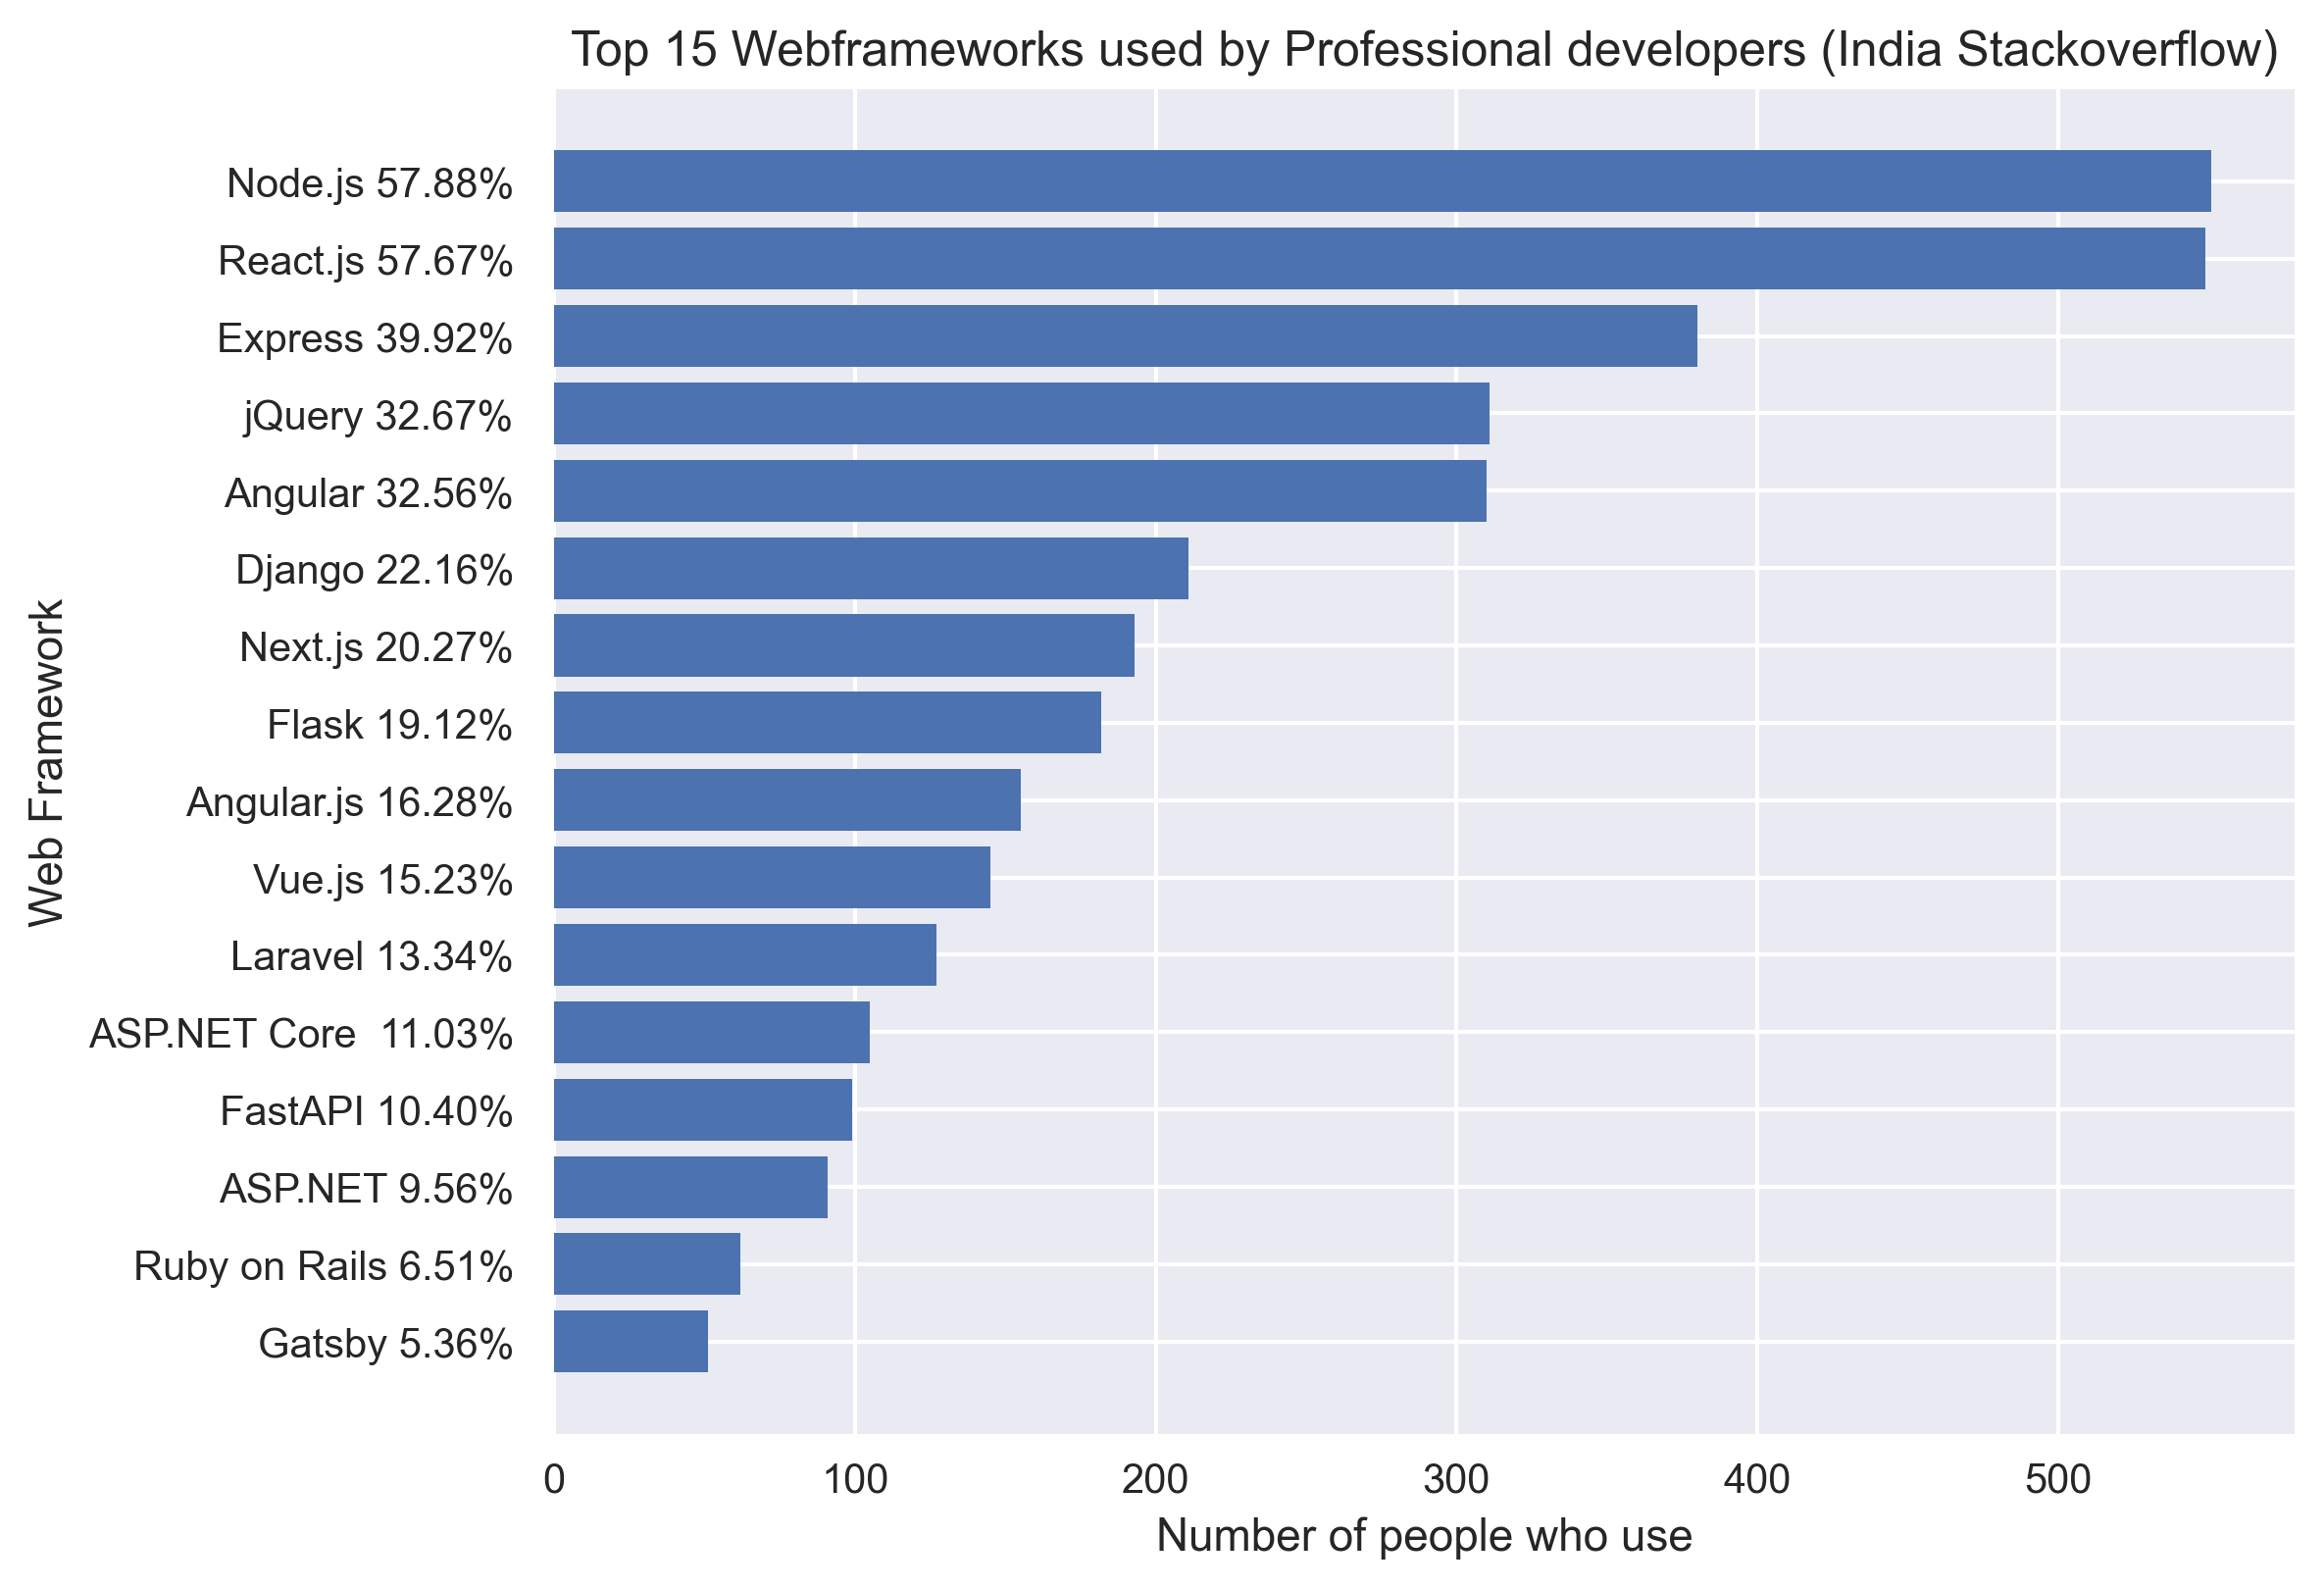

In [8]:
sov = StackoverflowSurvey(professional_india_df, keep_cols=['WebframeHaveWorkedWith'])
data, size = sov.distribution('WebframeHaveWorkedWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who use', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks used by Professional developers (India Stackoverflow)',
                                          path='data/img/Top Webframeworks used by Indian Professionals 2022')

# Top 15 Web frameworks wanted by Professional developers in India

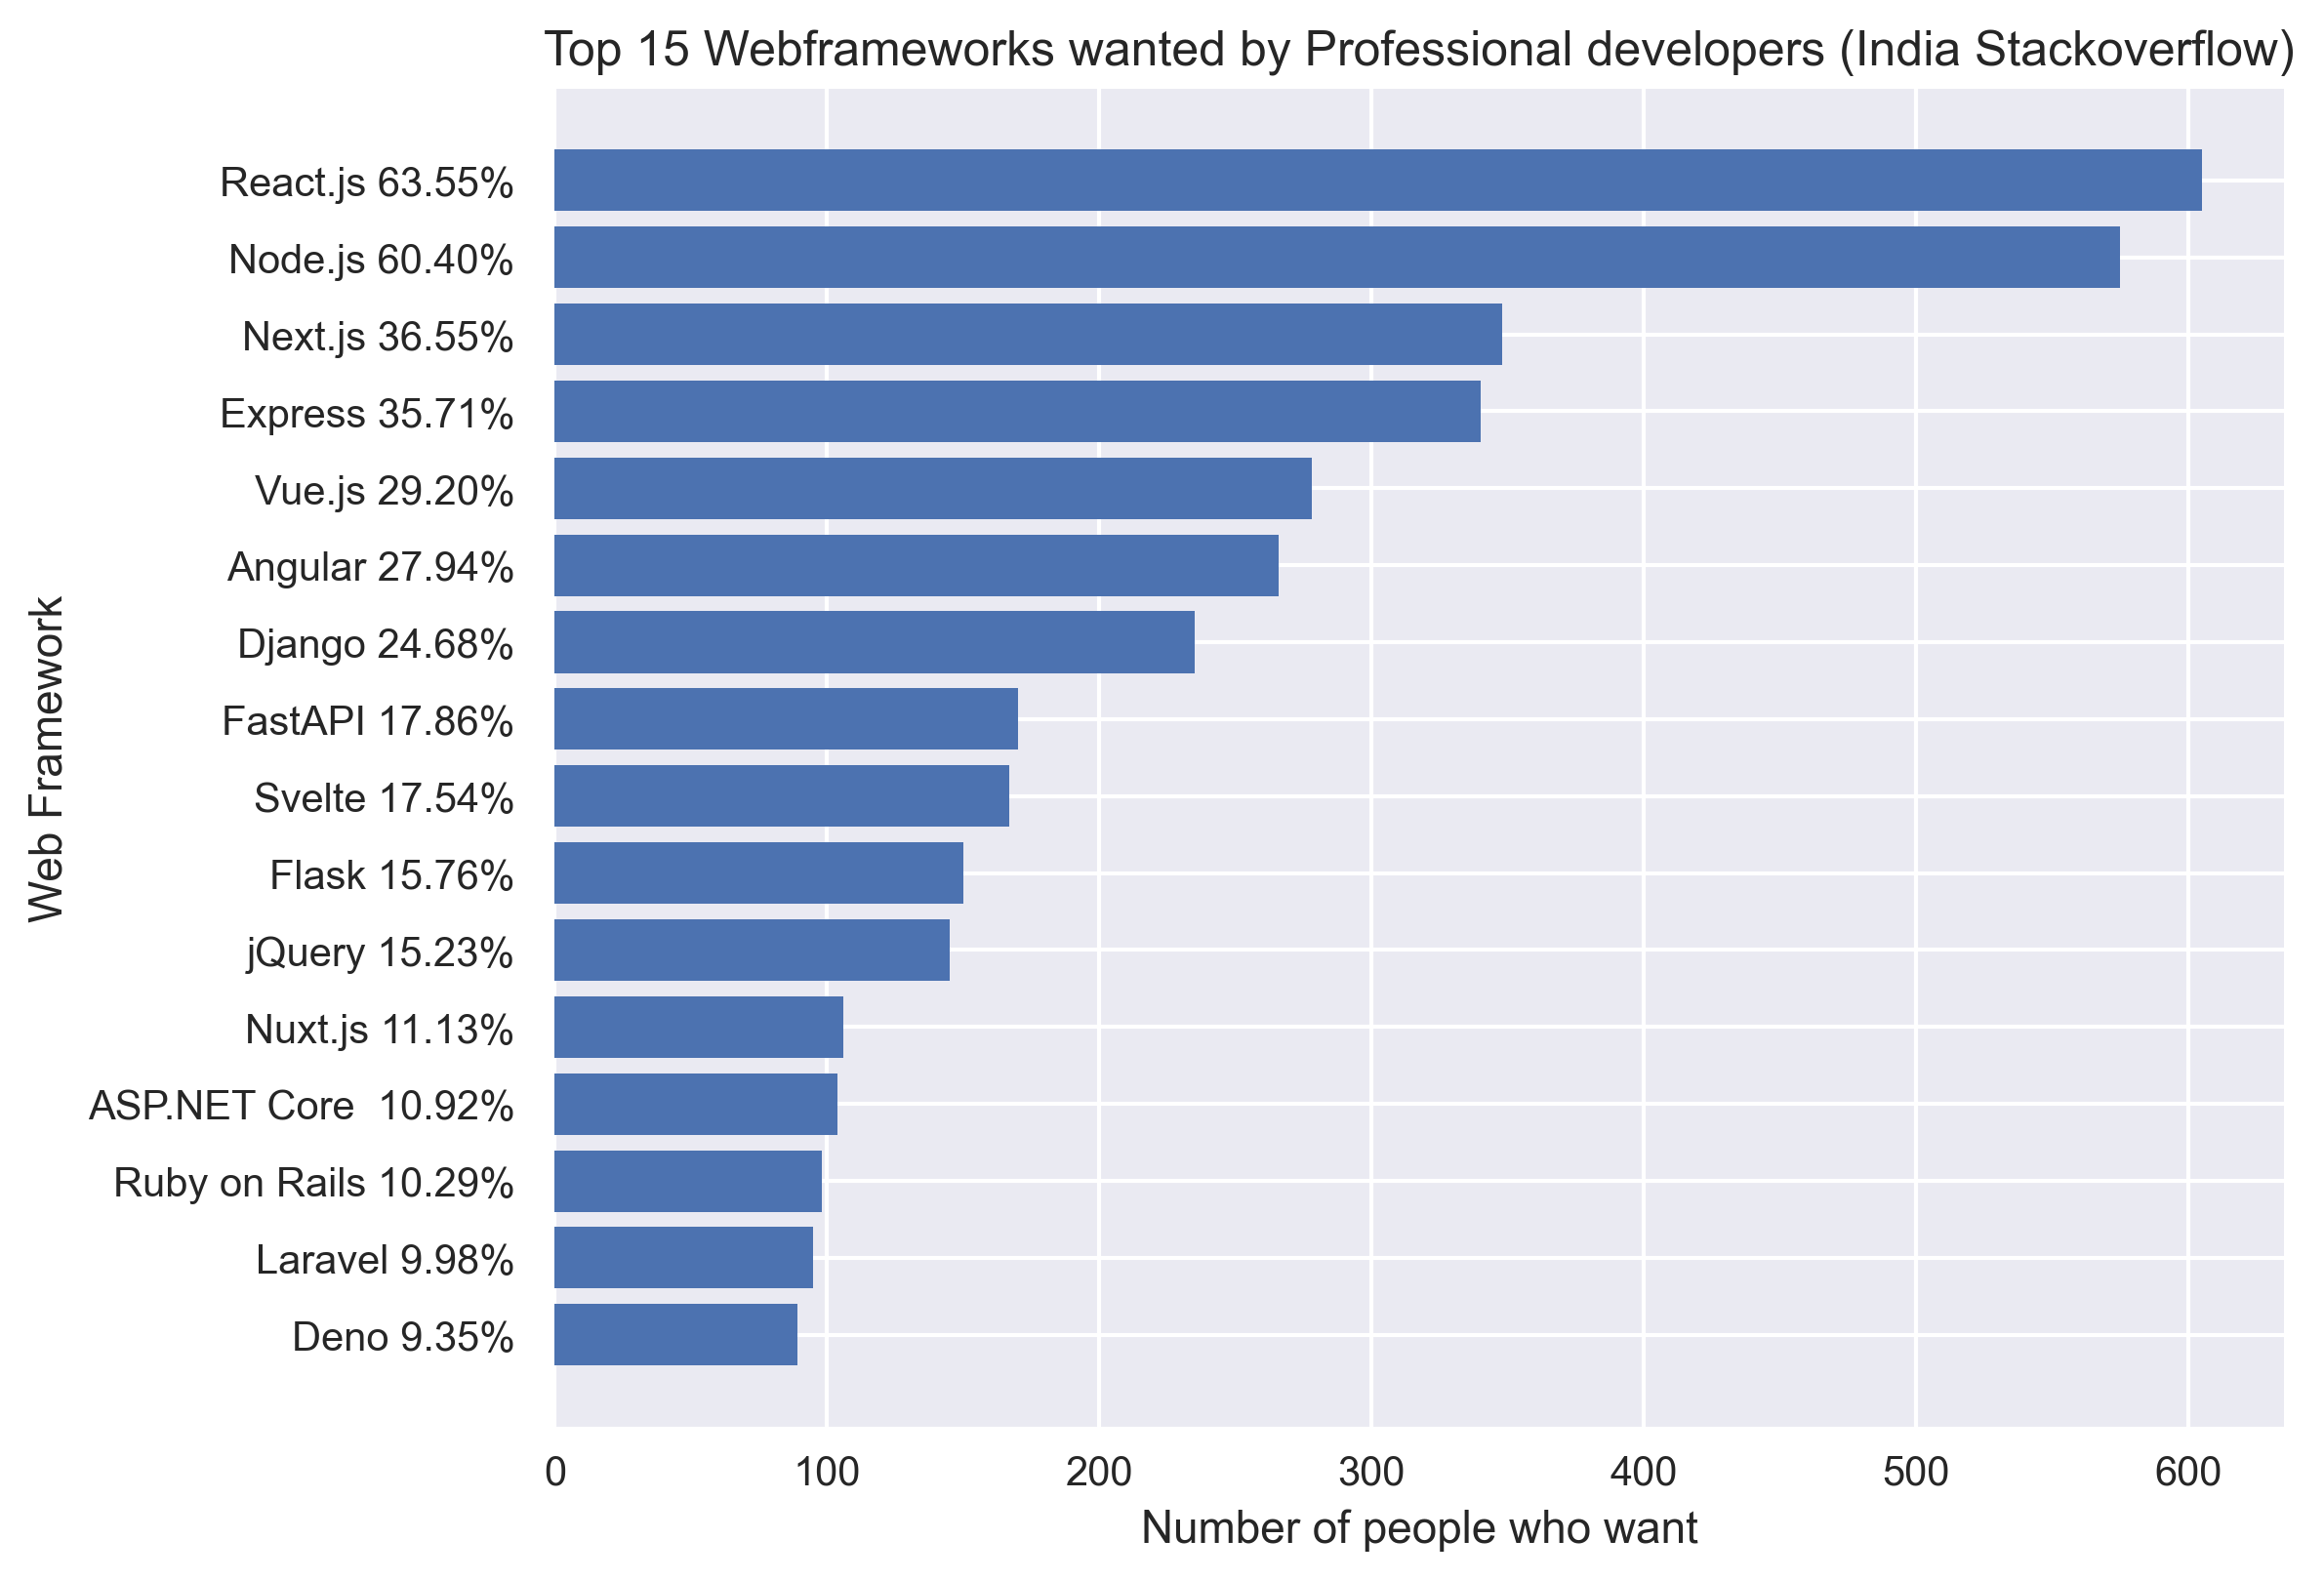

In [9]:
sov = StackoverflowSurvey(professional_india_df, keep_cols=['WebframeWantToWorkWith'])
data, size = sov.distribution('WebframeWantToWorkWith', top=15, withsize=True)
StackoverflowSurvey.visualize_distribution(data,
                                           size, 
                                           xlabel='Number of people who want', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks wanted by Professional developers (India Stackoverflow)',
                                          path='data/img/Top Webframeworks wanted by Indian Professionals 2022')

**Node.js**, **React.js** and **Express** are among the most popular webframeworks. More developers show interest in **Vue.js** and **Next.js**

## Salary distribution For Webframeworks in India

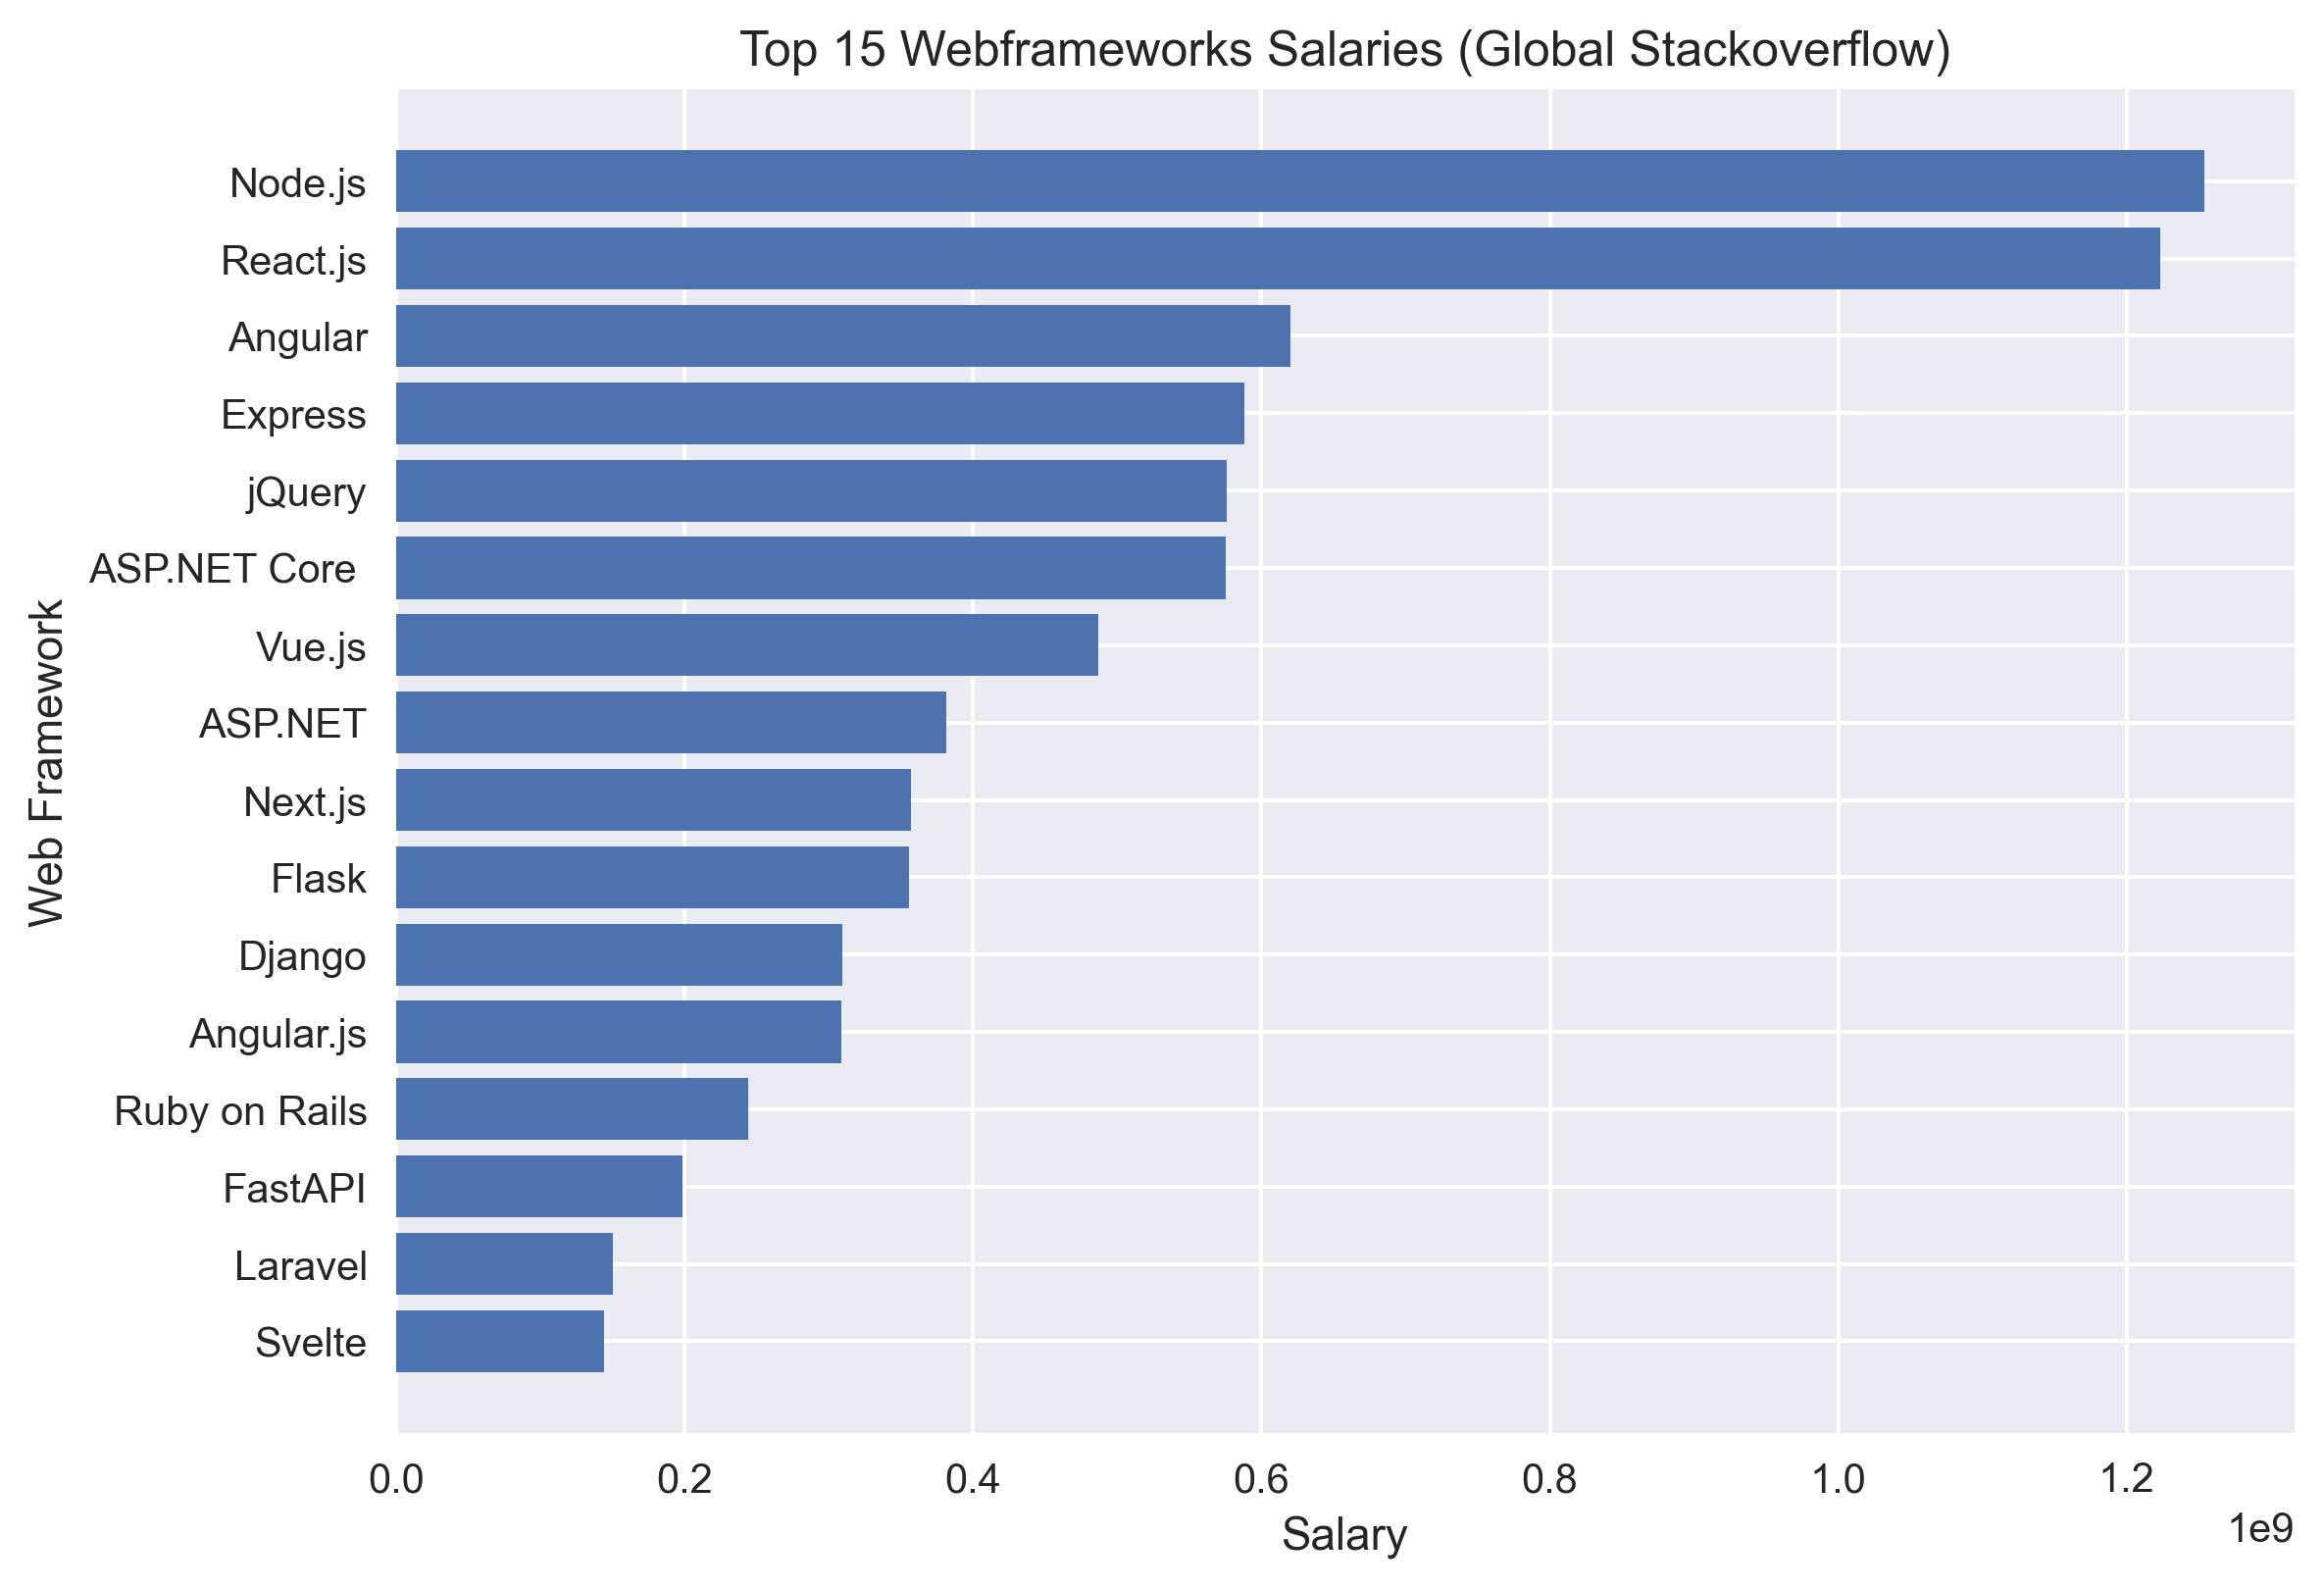

In [10]:
sov = StackoverflowSurvey(professional_df, keep_cols=['WebframeHaveWorkedWith', 'ConvertedCompYearly'])
data = sov.salary_distribution('WebframeHaveWorkedWith', top=15)
StackoverflowSurvey.visualize_distribution(data,
                                           None, 
                                           xlabel='Salary', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks Salaries (Global Stackoverflow)',
                                          path='data/img/Top Webframework salary globally 2022')

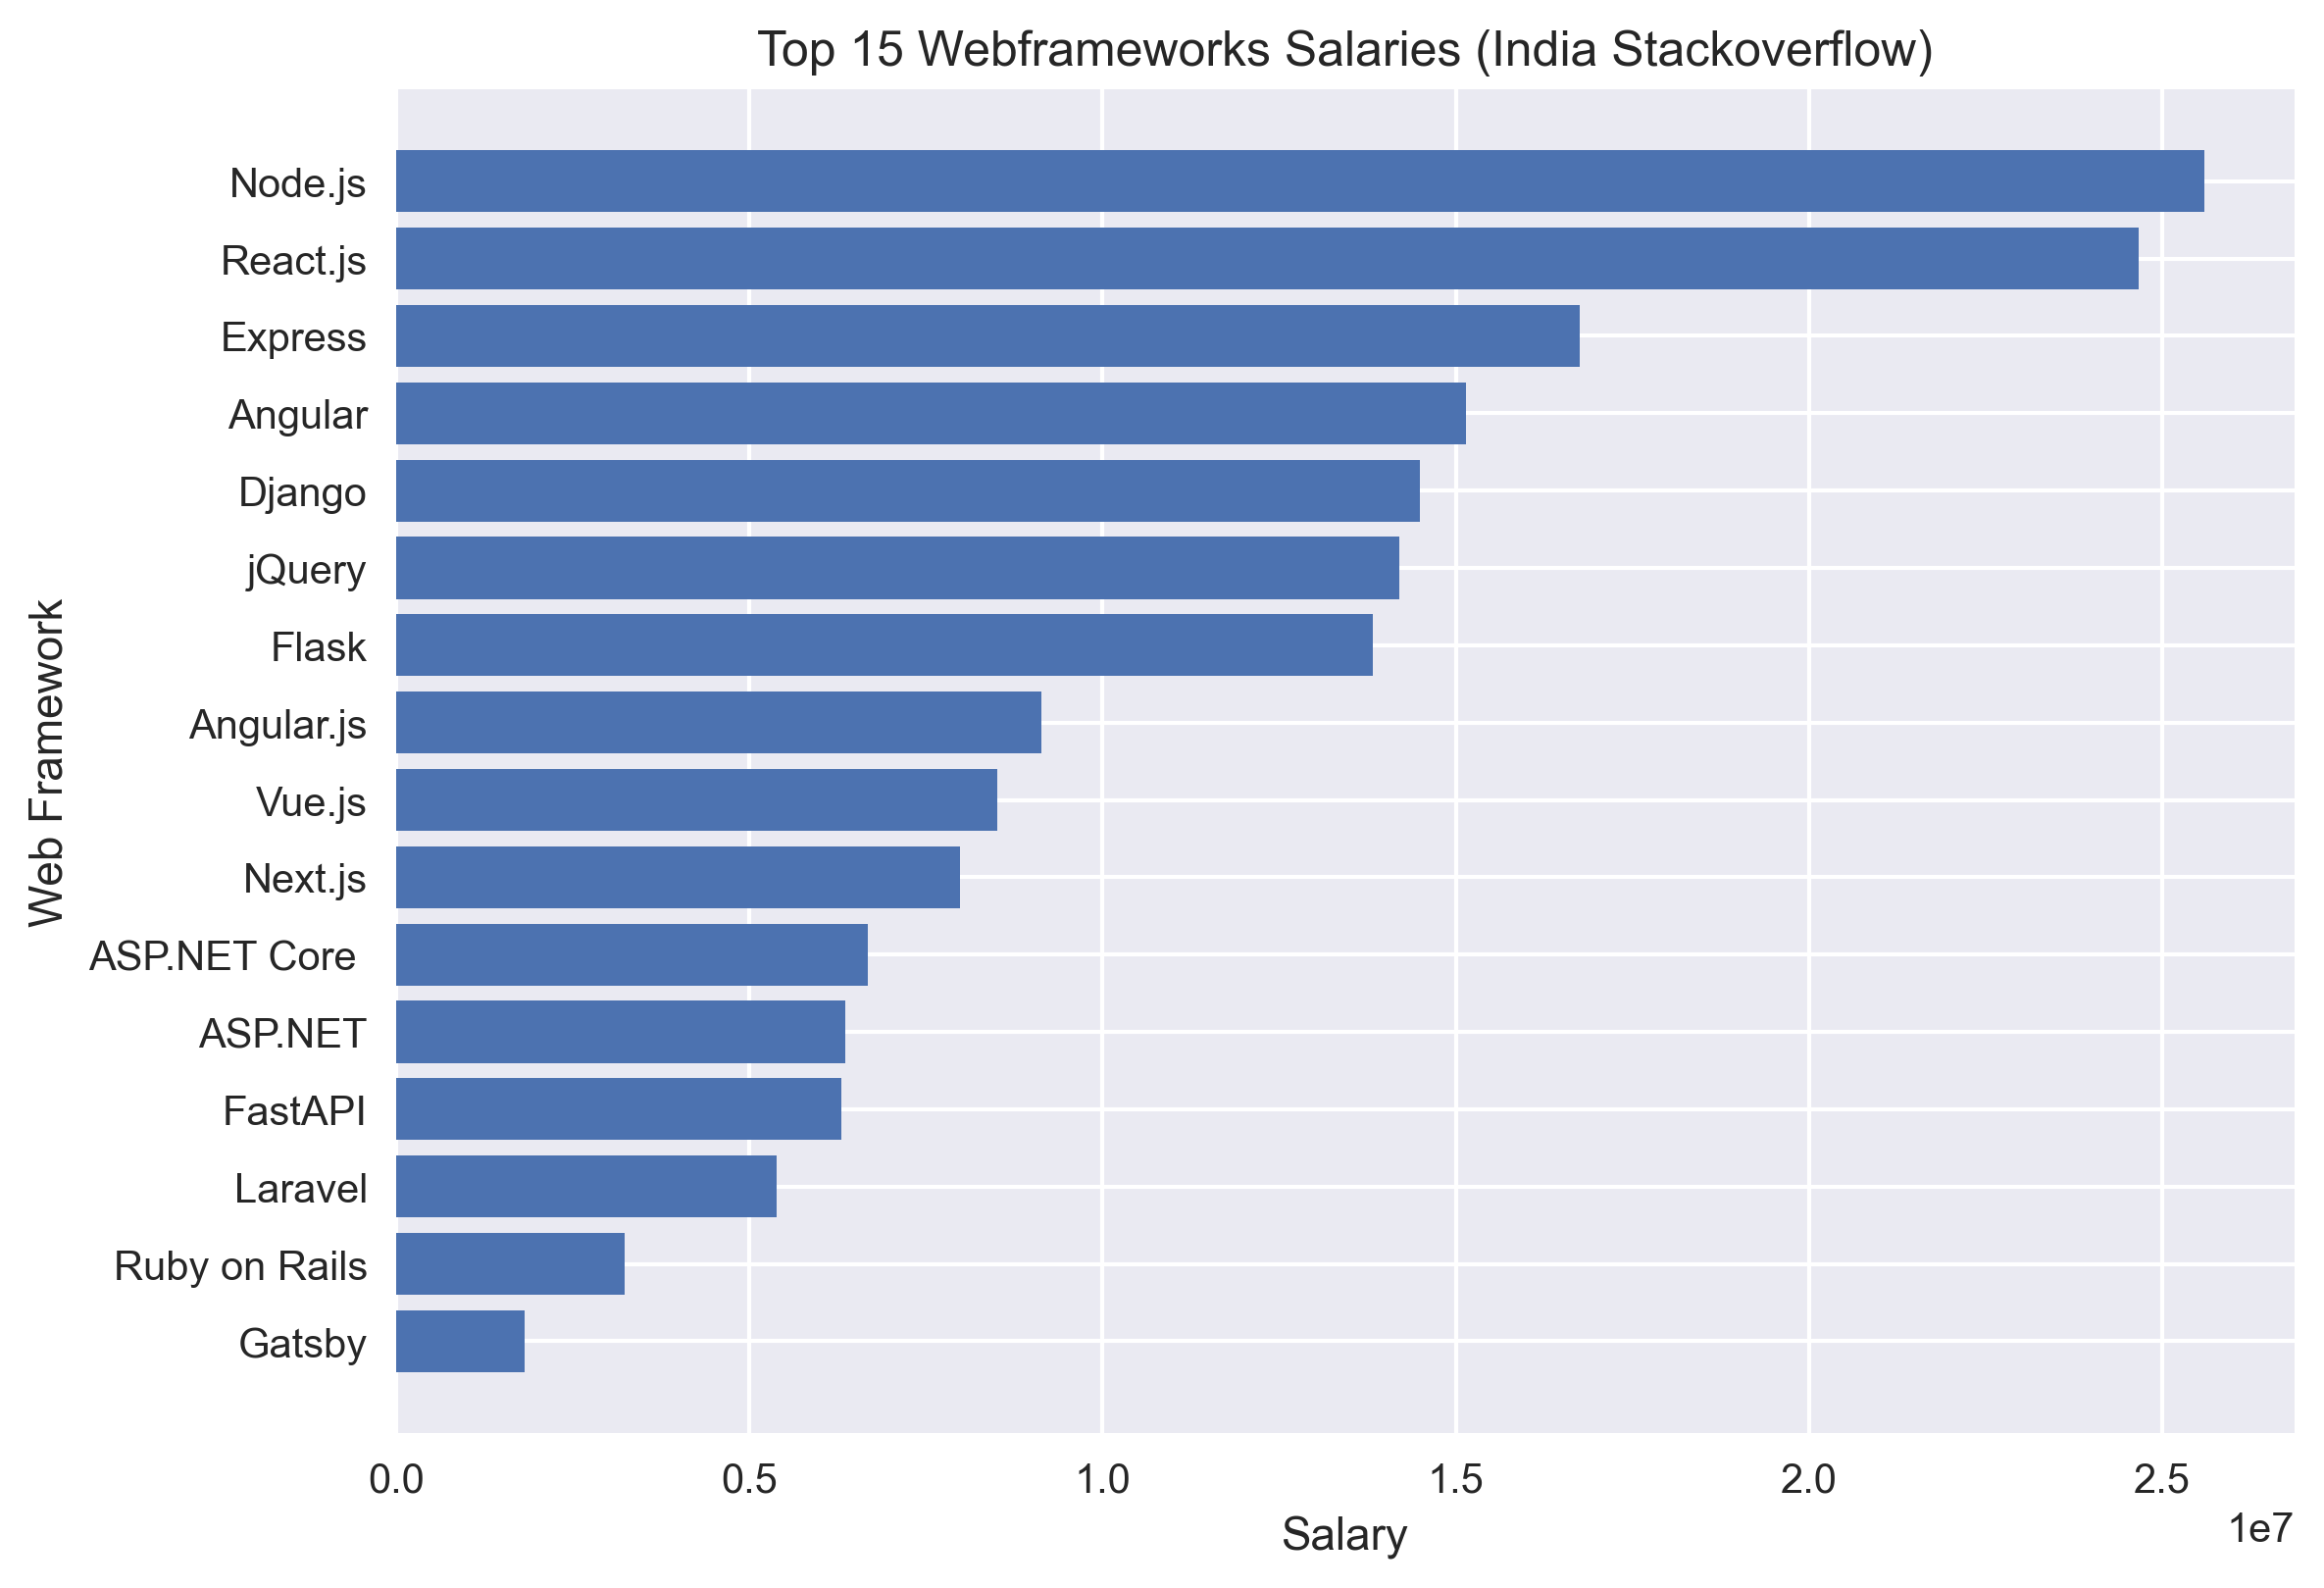

In [11]:
sov = StackoverflowSurvey(professional_india_df, keep_cols=['WebframeHaveWorkedWith', 'ConvertedCompYearly'])
data = sov.salary_distribution('WebframeHaveWorkedWith', top=15)
StackoverflowSurvey.visualize_distribution(data,
                                           None, 
                                           xlabel='Salary', 
                                           ylabel='Web Framework', 
                                           title='Top 15 Webframeworks Salaries (India Stackoverflow)', 
                                          path='data/img/Top Webframework salaries by Indian Professionals 2022')

**Node.js** and **React.js** are among the frameworks with maximum salaries. **Express** has more salary than **Angular** in India.

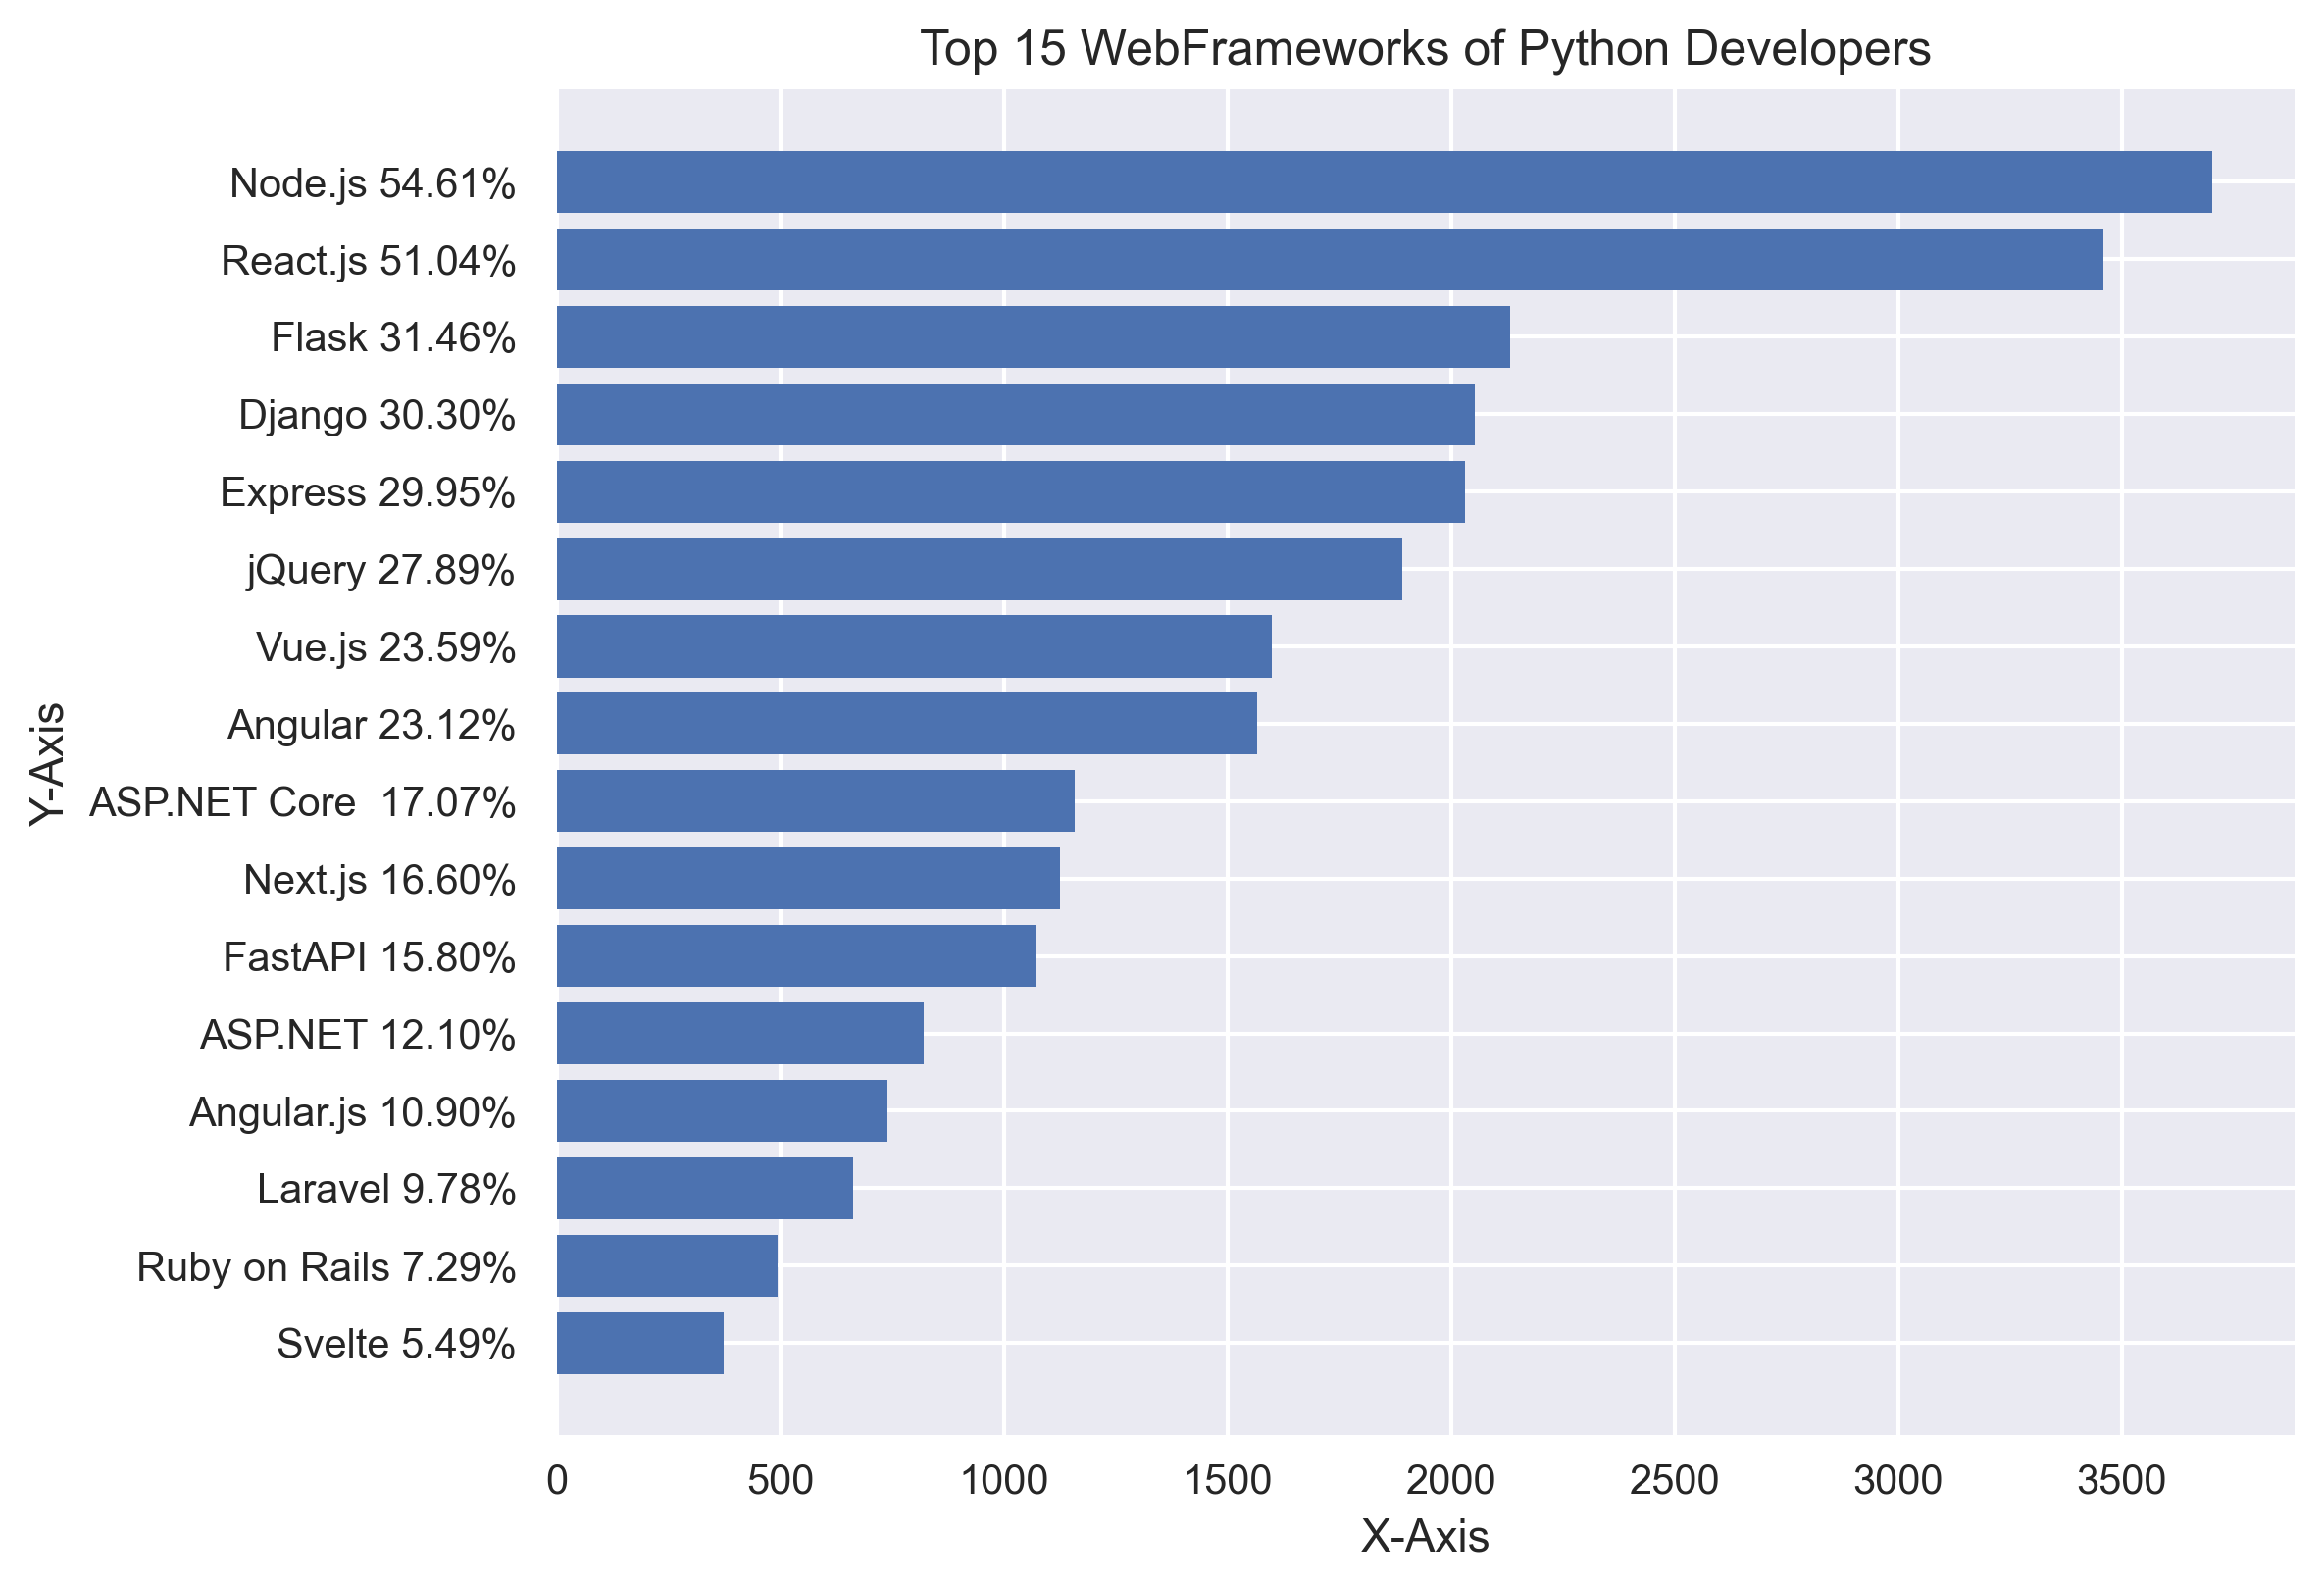

In [14]:
sov = StackoverflowSurvey(df)
data, size = sov.distribution('WebframeHaveWorkedWith', top=15, withsize=True, filter=('LanguageHaveWorkedWith', 'Python'))
StackoverflowSurvey.visualize_distribution(data, size, title='Top 15 WebFrameworks of Python Developers')